# Customer Segmentation Based on RFM Analysis and K-Means.

# Problem Statement

Customer segmentation adalah proses untuk mengelompokkan pelanggan berdasarkan karakteristik tertentu. Karakteristik tersebut akan memberikan kita pemahaman akan pelanggan. Dengan melakukan customer segmentation , kita dapat membagi customer menjadi beberapa cluster yang memiliki sifat yang mirip. Teknik customer segmentation mengasumsikan bahwa dalam setiap segmen yang terbentuk memerlukan pendekatan yang berbeda.
<br>

Ada beberapa jenis customer segmentation :
- Demografik ( Berdasarkan demografis (Usia, Jenis Kelamin,pekerjaan dll.)
- Geografis (Berdasarkan Tempat tinggal)
- Behavioural (Berdasarkan perilaku)
<br>
Kita akan menggunakan salah satu jenis customer segmentation behavioural, yaitu 
 Customer Segmentation dengan menggunakan RFM Matrix.
<br>  RFM Matrix bergantung pada 3 Metrics : 
1. **Recency** (Kapan Terahkir Customer membeli barang?)
1. **Frequency** (Seberapa Sering customer membeli barang?)
1. **Monetary** (Bagaimana monetary value dari transaksi yang dilakukan?)

<br> 
Menurut Arthur Hughes , Pelanggan yang telah membeli dari Anda baru-baru ini lebih cenderung menanggapi promosi Anda berikutnya daripada mereka yang pembelian terakhirnya dilakukan jauh di masa lalu. Hal ini juga berlaku untuk frequensi, seseorang yang lebih sering membeli barang akan menanggapi promosi daripada orang yang lebih jarang. Hal ini berlaku juga untuk orang yang nilai transaksinya lebih tinggi. Customer dengan nilai RFM yang tinggi cenderung lebih responsif terhadap suatu promosi / marketing campaign.
<br>
Dalam final project ini , saya akan menggunakan machine learning untuk melakukan customer segmentation dengan metode RFM, dengan tujuan membagi customer menjadi segmen-segmen yang memiliki sifat mirip berdasarkan RFM Matrix untuk kemudian datanya digunakan untuk membantu marketing melalui targeted marketing. Menurut CMO by Adobe, targeted marketing 2x lebih efektif daripada mass marketing. 



## Dataset

Dataset yang digunakan adalah [Brazillian Ecommerce Dataset by Olist](link:https://www.kaggle.com/olistbr/brazilian-ecommerce)  yang dipost di Kaggle.

# Data Preprocessing

Pertama, Kita akan mengimport packages yang diperlukan.

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
from plotly.graph_objs import *
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from itertools import product
import plotly.express as px

Selanjutnya, kita akan mengimport dataset yang ada.

In [3]:
customers=pd.read_csv('../datasets/brazil_ecomm/olist_customers_dataset.csv')
customers.head(2)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP

In [4]:
geolocation=pd.read_csv('../datasets/brazil_ecomm/olist_geolocation_dataset.csv')
geolocation.head(2)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP

In [5]:
order_items=pd.read_csv('../datasets/brazil_ecomm/olist_order_items_dataset.csv')
order_items.head(2)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93

In [6]:
orders=pd.read_csv('../datasets/brazil_ecomm/olist_orders_dataset.csv')
orders.head(2)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00

In [7]:
order_payments=pd.read_csv('../datasets/brazil_ecomm/olist_order_payments_dataset.csv')
order_payments.head(2)


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39

In [8]:
order_reviews=pd.read_csv('../datasets/brazil_ecomm/olist_order_reviews_dataset.csv')
order_reviews.head(2)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13

In [9]:
order_items=pd.read_csv('../datasets/brazil_ecomm/olist_order_items_dataset.csv')
order_items.head(2)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93

In [10]:
products=pd.read_csv('../datasets/brazil_ecomm/olist_products_dataset.csv')
products.head(2)

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0

In [11]:
sellers=pd.read_csv('../datasets/brazil_ecomm/olist_sellers_dataset.csv')
sellers.head(2)

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844  mogi guacu   

  seller_state  
0           SP  
1           SP

In [12]:
translate=pd.read_csv('../datasets/brazil_ecomm/product_category_name_translation.csv')
translate.head(2)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories

In [13]:
translate=pd.read_csv('../datasets/brazil_ecomm/product_category_name_translation.csv')
translate.head(2)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories

In [14]:
order_payments=pd.read_csv('../datasets/brazil_ecomm/olist_order_payments_dataset.csv')
order_payments.head(2)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39

Selanjutnya kita akan melakukan merge untuk dataframe yang diperlukan

In [238]:
df_big=orders.merge(order_payments,on='order_id',how='inner').merge(customers,on='customer_id',how='inner').merge(order_items,on='order_id',how='inner',).merge(order_payments,on='order_id',how='inner')
df_big

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
...                                  ...                               ...   
139412  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
139413  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
139414  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
139415  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
139416  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
4         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
...             ...                      ...                  ...   
139412    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
139413    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
139414    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
139415    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
139416    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-10-04 19:55:00           2017-10-10 21:25:13   
4               2017-10-04 19:55:00           2017-10-10 21:25:13   
...                             ...                           ...   
139412          2018-02-07 23:22:42           2018-02-28 17:37:56   
139413          2017-08-28 20:52:26           2017-09-21 11:24:17   
139414          2018-01-12 15:35:03           2018-01-25 23:32:54   
139415          2018-01-12 15:35:03           2018-01-25 23:32:54   
139416          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  payment_sequential_x payment_type_x  \
0                2017-10-18 00:00:00                     1    credit_card   
1                2017-10-18 00:00:00                     1    credit_card   
2                2017-10-18 00:00:00                     1    credit_card   
3                2017-10-18 00:00:00                     3        voucher   
4                2017-10-18 00:00:00                     3        voucher   
...                              ...                   ...            ...   
139412           2018-03-02 00:00:00                     1    credit_card   
139413           2017-09-27 00:00:00                     1    credit_card   
139414           2018-02-15 00:00:00                     1    credit_card   
139415           2018-02-15 00:00:00                     1    credit_card   
139416           2018-04-03 00:00:00                     1     debit_card   

        ...  order_item_id                        product_id  \
0       ...              1  87285b34884572647811a353c7ac498a   
1       ...              1  87285b34884572647811a353c7ac498a   
2       ...              1  87285b34884572647811a353c7ac498a   
3       ...              1  87285b34884572647811a353c7ac498a   
4       ...              1  87285b34884572647811a353c7ac498a   
...     ...            ...                               ...   
139412  ...              1  f1d4ce8c6dd66c47bbaa8c6781c2a923   


In [239]:
df_big.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential_x', 'payment_type_x', 'payment_installments_x',
       'payment_value_x', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential_y', 'payment_type_y', 'payment_installments_y',
       'payment_value_y'],
      dtype='object')

Disini kita akan mengambil kolom yang dibutuhkan saja , agar lebih mudah untuk dibaca.

In [243]:
big_df_clean=df_big['order_id customer_unique_id customer_city order_status price order_delivered_customer_date'.split()]
big_df_clean

order_id                customer_unique_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
4       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
...                                  ...                               ...   
139412  63943bddc261676b46f01ca7ac2f7bd8  da62f9e57a76d978d02ab5362c509660   
139413  83c1379a015df1e13d02aae0204711ab  737520a9aad80b3fbbdad19b66b37b30   
139414  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
139415  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
139416  66dea50a8b16d9b4dee7af250b4be1a5  60350aa974b26ff12caad89e55993bd6   

       customer_city order_status   price order_delivered_customer_date  
0          sao paulo    delivered   29.99           2017-10-10 21:25:13  
1          sao paulo    delivered   29.99           2017-10-10 21:25:13  
2          sao paulo    delivered   29.99           2017-10-10 21:25:13  
3          sao paulo    delivered   29.99           2017-10-10 21:25:13  
4          sao paulo    delivered   29.99           2017-10-10 21:25:13  
...              ...          ...     ...                           ...  
139412  praia grande    delivered  174.90           2018-02-28 17:37:56  
139413   nova vicosa    delivered  205.99           2017-09-21 11:24:17  
139414       japuiba    delivered  179.99           2018-01-25 23:32:54  
139415       japuiba    delivered  179.99           2018-01-25 23:32:54  
139416          lapa    delivered   68.50           2018-03-16 13:08:30  

[139417 rows x 6 columns]

In [244]:
big_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139417 entries, 0 to 139416
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       139417 non-null  object 
 1   customer_unique_id             139417 non-null  object 
 2   customer_city                  139417 non-null  object 
 3   order_status                   139417 non-null  object 
 4   price                          139417 non-null  float64
 5   order_delivered_customer_date  135718 non-null  object 
dtypes: float64(1), object(5)
memory usage: 7.4+ MB


In [245]:
big_df_clean['order_delivered_customer_date']=pd.to_datetime(big_df_clean['order_delivered_customer_date'],yearfirst=True)
big_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139417 entries, 0 to 139416
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       139417 non-null  object        
 1   customer_unique_id             139417 non-null  object        
 2   customer_city                  139417 non-null  object        
 3   order_status                   139417 non-null  object        
 4   price                          139417 non-null  float64       
 5   order_delivered_customer_date  135718 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.4+ MB


<ipython-input-245-d11a0540c078>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Kita anggap data valid hanya yang DELIVERED dan SHIPPED saja , dan kita akan memperkecil scope untuk customer city hanya di sao paolo , karena sao paolo memiliki data terbanyak

In [246]:
big_df_clean['order_status'].value_counts()

delivered      135719
shipped          2132
canceled          672
processing        485
invoiced          399
unavailable         7
approved            3
Name: order_status, dtype: int64

In [247]:
big_df_clean['customer_city'].value_counts(normalize=True)

sao paulo              0.167870
rio de janeiro         0.072832
belo horizonte         0.025642
brasilia               0.018728
campinas               0.016289
                         ...   
major porto            0.000007
capoeiras              0.000007
lajeado grande         0.000007
passa tempo            0.000007
desembargador otoni    0.000007
Name: customer_city, Length: 4110, dtype: float64

In [248]:
valid=['delivered','shipped']

In [249]:
big_df_clean_filtered=big_df_clean.loc[(big_df_clean['customer_city']=='sao paulo') & (big_df_clean['order_status'].isin(valid))]

In [250]:
big_df_clean_filtered['order_status'].value_counts()

delivered    22875
shipped        167
Name: order_status, dtype: int64

In [251]:
print(f"ada {big_df_clean_filtered.order_id.nunique()} jumlah unique order dan {big_df_clean_filtered.customer_unique_id.nunique()} jumlah customer di area sao paolo.")

ada 15186 jumlah unique order dan 14662 jumlah customer di area sao paolo.


Dapat dilihat ada 15186 Unique order dalam dataset ini

In [252]:
big_df_clean_filtered.groupby(['order_id','customer_unique_id'])[['customer_city']].count().rename

<bound method DataFrame.rename of                                                                    customer_city
order_id                         customer_unique_id                             
000e63d38ae8c00bbcb5a30573b99628 860fc00d3154ce2346c43ebe47b9b6ce              1
0011d82c4b53e22e84023405fb467e57 02daaa0e021d624d1784c4ea5cc84ace              1
001c85b5f68d2be0cb0797afc9e8ce9a 55a269f324455e78349e7b9b7e7e5911              1
001d8f0e34a38c37f7dba2a37d4eba8b 870a0bdc769f9a7870309036740e79ea              2
0026a368634b6e6f34f33b1499773a30 2ecb0fc377050ca3b001d3a199e951ec              1
...                                                                          ...
ffed7e90414c1477a6b92554661d465f 02fb446e82415f8d22a44a8dd49c1954              1
ffef98cd5ecdc992fefbd967549520dd 2c27e67b4518e5db1b0b1faf8fb920c7              1
ffefb169ddf34cecc0622a6d3cc387f8 d11fd20c68a7d716b6e2df9bccda5b8e              1
fff90cdcb3b2e6cfb397d05d562fd3fe 0e1dad535a5b2359a2ff0a7d475ffb86          

In [253]:
customer=pd.crosstab(index=big_df_clean_filtered['customer_unique_id'],columns='count').reset_index()
customer

col_0                customer_unique_id  count
0      0004bd2a26a76fe21f786e4fbd80607f      1
1      000d460961d6dbfa3ec6c9f5805769e1      1
2      000ed48ceeb6f4bf8ad021a10a3c7b43      1
3      0010fb34b966d44409382af9e8fd5b77      1
4      0014a5a58da615f7b01a4f5e194bf5ea      1
...                                 ...    ...
14657  ffca77d46c6d7d815549a5e4482dba2f      1
14658  ffcd4b43c08405501a6bf2c66be83e83      1
14659  ffddff7cfa827d6c430ed9e373be416c      1
14660  ffe0c10afc687bcf34a0451f2b87dd9b      1
14661  ffe8f2fc0cee48f79934bd2c506fafc0      1

[14662 rows x 2 columns]

In [254]:
customer['count'].unique()

array([   1,    2,    7,    5,    3,    4,    8,    6,  144,   75,   18,
         32,   16,   36,    9,   81,   12,   20,   25,  200,   10,   21,
        676,  169,   13,   49,   11,   74, 1467,  145,  225], dtype=int64)

In [255]:
customer['count'].value_counts()

1       12375
2        1420
4         360
3         275
5          70
9          37
8          30
6          26
16         13
7          10
18          5
12          5
25          5
36          4
11          3
10          3
49          3
13          2
20          2
32          2
169         2
21          1
144         1
200         1
1467        1
676         1
81          1
75          1
225         1
74          1
145         1
Name: count, dtype: int64

In [31]:
customer.describe()

col_0         count
count  14662.000000
mean       1.571545
std       13.917715
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max     1467.000000

<AxesSubplot:xlabel='count'>

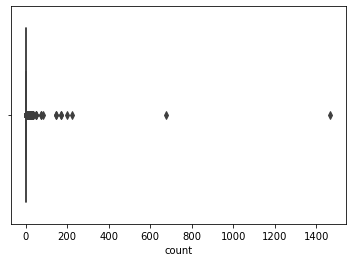

In [32]:
sns.boxplot(data=customer,x='count')

<AxesSubplot:xlabel='count', ylabel='count'>

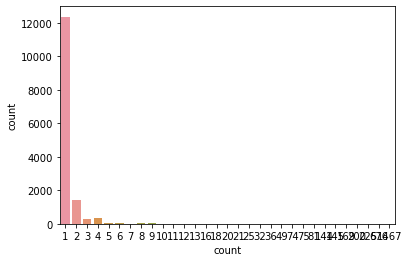

In [33]:
sns.countplot(data=customer,x='count')

In [34]:
big_df_clean_filtered

order_id                customer_unique_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
4       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
...                                  ...                               ...   
139374  87b4c933f31145a28413b39d880ad6c3  490c3c53ca927221bccbb00706afbcf9   
139379  e8fd20068b9f7e6ec07068bb7537f781  fb9310710003399b031add3e55f34719   
139380  e8fd20068b9f7e6ec07068bb7537f781  fb9310710003399b031add3e55f34719   
139394  0e4b26f1fb99fc0f0472dd5f403d36d4  22757c044f096bef19c36c5d6ffc51d5   
139410  880675dff2150932f1601e1c07eadeeb  831ce3f1bacbd424fc4e38fbd4d66d29   

       customer_city order_status   price order_delivered_customer_date  
0          sao paulo    delivered   29.99           2017-10-10 21:25:13  
1          sao paulo    delivered   29.99           2017-10-10 21:25:13  
2          sao paulo    delivered   29.99           2017-10-10 21:25:13  
3          sao paulo    delivered   29.99           2017-10-10 21:25:13  
4          sao paulo    delivered   29.99           2017-10-10 21:25:13  
...              ...          ...     ...                           ...  
139374     sao paulo    delivered   57.99           2018-03-16 17:21:55  
139379     sao paulo    delivered  356.00           2017-08-23 15:36:29  
139380     sao paulo    delivered  356.00           2017-08-23 15:36:29  
139394     sao paulo    delivered   28.00           2017-11-08 16:08:56  
139410     sao paulo    delivered  139.90           2017-03-06 11:08:08  

[23042 rows x 6 columns]

Mari kita lihat historical transaksi tiap bulan

In [35]:
big_df_clean_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23042 entries, 0 to 139410
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       23042 non-null  object        
 1   customer_unique_id             23042 non-null  object        
 2   customer_city                  23042 non-null  object        
 3   order_status                   23042 non-null  object        
 4   price                          23042 non-null  float64       
 5   order_delivered_customer_date  22875 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.2+ MB


In [256]:
big_df_clean_filtered['month_year']=big_df_clean_filtered['order_delivered_customer_date'].dt.strftime('%Y-%m')
big_df_clean_filtered

<ipython-input-256-87958c7df9a5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



order_id                customer_unique_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
2       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
4       e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
...                                  ...                               ...   
139374  87b4c933f31145a28413b39d880ad6c3  490c3c53ca927221bccbb00706afbcf9   
139379  e8fd20068b9f7e6ec07068bb7537f781  fb9310710003399b031add3e55f34719   
139380  e8fd20068b9f7e6ec07068bb7537f781  fb9310710003399b031add3e55f34719   
139394  0e4b26f1fb99fc0f0472dd5f403d36d4  22757c044f096bef19c36c5d6ffc51d5   
139410  880675dff2150932f1601e1c07eadeeb  831ce3f1bacbd424fc4e38fbd4d66d29   

       customer_city order_status   price order_delivered_customer_date  \
0          sao paulo    delivered   29.99           2017-10-10 21:25:13   
1          sao paulo    delivered   29.99           2017-10-10 21:25:13   
2          sao paulo    delivered   29.99           2017-10-10 21:25:13   
3          sao paulo    delivered   29.99           2017-10-10 21:25:13   
4          sao paulo    delivered   29.99           2017-10-10 21:25:13   
...              ...          ...     ...                           ...   
139374     sao paulo    delivered   57.99           2018-03-16 17:21:55   
139379     sao paulo    delivered  356.00           2017-08-23 15:36:29   
139380     sao paulo    delivered  356.00           2017-08-23 15:36:29   
139394     sao paulo    delivered   28.00           2017-11-08 16:08:56   
139410     sao paulo    delivered  139.90           2017-03-06 11:08:08   

       month_year  
0         2017-10  
1         2017-10  
2         2017-10  
3         2017-10  
4         2017-10  
...           ...  
139374    2018-03  
139379    2017-08  
139380    2017-08  
139394    2017-11  
139410    2017-03  

[23042 rows x 7 columns]

In [257]:
monthly_sales=pd.DataFrame(big_df_clean_filtered.groupby('month_year')['price'].sum()).reset_index()
monthly_sales

month_year      price
0     2016-10    2746.43
1     2016-11     672.47
2     2016-12      71.00
3     2017-01    4060.94
4     2017-02   30954.04
5     2017-03   69658.75
6     2017-04   46128.54
7     2017-05  103515.53
8     2017-06  255497.06
9     2017-07   68721.23
10    2017-08  179588.41
11    2017-09  118767.85
12    2017-10   89315.40
13    2017-11   94769.54
14    2017-12  156189.27
15    2018-01  127948.84
16    2018-02  125357.49
17    2018-03  167858.73
18    2018-04  174562.67
19    2018-05  166378.83
20    2018-06  162411.63
21    2018-07  123406.06
22    2018-08  214561.83
23    2018-09    1673.90

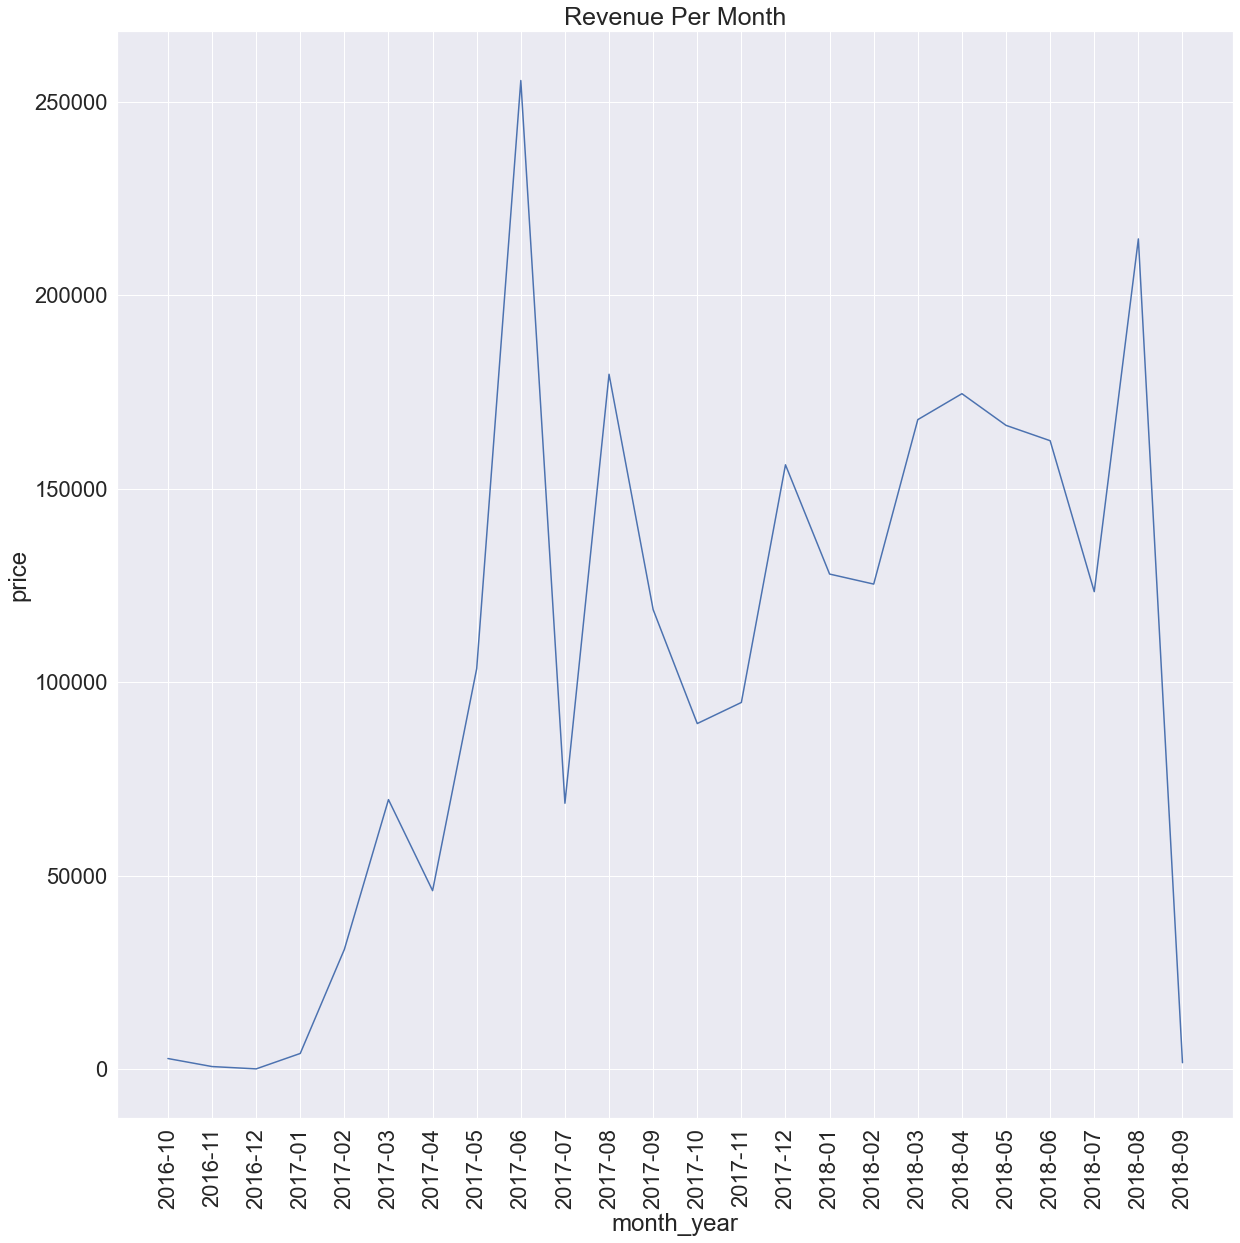

In [258]:
plt.figure(figsize=(20,20))
plt.title('Revenue Per Month',fontdict={'fontsize' : 25})
sns.lineplot(data=monthly_sales,x='month_year',y='price')
plt.xticks(rotation=90)
plt.show()

# RFM Creation

Dari penjelasan di dataset , order ID tidak unique karena ada beberapa barang dalam 1 order. untuk harga setiap barang harus dijumlah agar didapatkan nilai moneter dari order tersebut. Kita akan menggabungkan price dengan fungsi ``` aggregate ``` untuk menggabungkan row dalam dataframe. Untuk fungsi aggregate kita akan menggunakan sebagai berikut : 
1. customer_unique_id, customer city, order_status : first (mengambil data pertama)
1. price : sum
1. order_delivered_customer_date : max (untuk mengambil data pembelian terahkir.

In [259]:
big_df_clean_filtered_combined = big_df_clean_filtered.groupby(['order_id',]).aggregate({'customer_unique_id' : 'first', 'customer_city' : 'first', 'order_status' : 'first' ,'price' : 'sum' , 'order_delivered_customer_date' : 'max'}).reset_index()
big_df_clean_filtered_combined

order_id                customer_unique_id  \
0      000e63d38ae8c00bbcb5a30573b99628  860fc00d3154ce2346c43ebe47b9b6ce   
1      0011d82c4b53e22e84023405fb467e57  02daaa0e021d624d1784c4ea5cc84ace   
2      001c85b5f68d2be0cb0797afc9e8ce9a  55a269f324455e78349e7b9b7e7e5911   
3      001d8f0e34a38c37f7dba2a37d4eba8b  870a0bdc769f9a7870309036740e79ea   
4      0026a368634b6e6f34f33b1499773a30  2ecb0fc377050ca3b001d3a199e951ec   
...                                 ...                               ...   
15181  ffed7e90414c1477a6b92554661d465f  02fb446e82415f8d22a44a8dd49c1954   
15182  ffef98cd5ecdc992fefbd967549520dd  2c27e67b4518e5db1b0b1faf8fb920c7   
15183  ffefb169ddf34cecc0622a6d3cc387f8  d11fd20c68a7d716b6e2df9bccda5b8e   
15184  fff90cdcb3b2e6cfb397d05d562fd3fe  0e1dad535a5b2359a2ff0a7d475ffb86   
15185  fffce4705a9662cd70adb13d4a31832d  cd79b407828f02fdbba457111c38e4c4   

      customer_city order_status   price order_delivered_customer_date  
0         sao paulo    delivered   47.90           2018-03-27 14:51:47  
1         sao paulo    delivered  289.00           2018-01-26 22:14:02  
2         sao paulo    delivered   99.00           2017-12-22 18:37:40  
3         sao paulo    delivered   37.98           2017-05-26 13:14:50  
4         sao paulo    delivered  149.00           2017-11-07 21:58:51  
...             ...          ...     ...                           ...  
15181     sao paulo    delivered  149.90           2017-08-14 15:52:37  
15182     sao paulo    delivered  139.90           2017-07-14 16:19:41  
15183     sao paulo    delivered  129.99           2017-07-19 16:36:31  
15184     sao paulo    delivered   89.90           2017-11-29 02:24:25  
15185     sao paulo    delivered   99.90           2017-10-28 12:22:22  

[15186 rows x 6 columns]

In [260]:
big_df_clean_filtered_combined.describe()

price
count   15186.000000
mean      164.652643
std      1547.503518
min         2.290000
25%        40.000000
50%        79.900000
75%       143.800000
max    162841.500000

In [261]:
big_df_clean_filtered_combined.describe(include='object')

order_id                customer_unique_id  \
count                              15186                             15186   
unique                             15186                             14662   
top     709e863921cdc58bb0582cf305270d72  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                16   

       customer_city order_status  
count          15186        15186  
unique             1            2  
top        sao paulo    delivered  
freq           15186        15045

In [262]:
cek=pd.DataFrame(big_df_clean_filtered_combined.customer_unique_id.value_counts())
cek

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455                  16
fe81bb32c243a86b2f86fbf053fe6140                   5
74cb1ad7e6d5674325c1f99b5ea30d82                   5
394ac4de8f3acb14253c177f0e15bc58                   5
6358b15ef7fa9b1210f1a5735cabd3d9                   4
...                                              ...
7b9028e6d7eec1895d0052145737aef0                   1
2d10b4a9a412ef6bf4476223677a7a7a                   1
d5e1d8cda9a7b12022c478befe7827b4                   1
37604742d757533a699692a6e1d1e45e                   1
70fc429b7bf128070c74d50e27d0c6a2                   1

[14662 rows x 1 columns]

Dapat dilihat ada 14662 Unique value. Berarti ada 14662 customer di dalam data ecommerce sao paolo.

dari histogram di atas dapat dilihat bahwa rata2 tiap orang memiliki 1 order.
kita lakukan penambahan dummy variable dan ```groupby.sum()``` DataFrame based on customer_Id supaya bisa didapatkan value frequency pada masing masing customer id

In [43]:
df_rfm=big_df_clean_filtered_combined['customer_unique_id order_id price order_delivered_customer_date'.split()]
df_rfm

customer_unique_id                          order_id  \
0      860fc00d3154ce2346c43ebe47b9b6ce  000e63d38ae8c00bbcb5a30573b99628   
1      02daaa0e021d624d1784c4ea5cc84ace  0011d82c4b53e22e84023405fb467e57   
2      55a269f324455e78349e7b9b7e7e5911  001c85b5f68d2be0cb0797afc9e8ce9a   
3      870a0bdc769f9a7870309036740e79ea  001d8f0e34a38c37f7dba2a37d4eba8b   
4      2ecb0fc377050ca3b001d3a199e951ec  0026a368634b6e6f34f33b1499773a30   
...                                 ...                               ...   
15181  02fb446e82415f8d22a44a8dd49c1954  ffed7e90414c1477a6b92554661d465f   
15182  2c27e67b4518e5db1b0b1faf8fb920c7  ffef98cd5ecdc992fefbd967549520dd   
15183  d11fd20c68a7d716b6e2df9bccda5b8e  ffefb169ddf34cecc0622a6d3cc387f8   
15184  0e1dad535a5b2359a2ff0a7d475ffb86  fff90cdcb3b2e6cfb397d05d562fd3fe   
15185  cd79b407828f02fdbba457111c38e4c4  fffce4705a9662cd70adb13d4a31832d   

        price order_delivered_customer_date  
0       47.90           2018-03-27 14:51:47  
1      289.00           2018-01-26 22:14:02  
2       99.00           2017-12-22 18:37:40  
3       37.98           2017-05-26 13:14:50  
4      149.00           2017-11-07 21:58:51  
...       ...                           ...  
15181  149.90           2017-08-14 15:52:37  
15182  139.90           2017-07-14 16:19:41  
15183  129.99           2017-07-19 16:36:31  
15184   89.90           2017-11-29 02:24:25  
15185   99.90           2017-10-28 12:22:22  

[15186 rows x 4 columns]

In [44]:
df_rfm['frequency']=1
df_rfm

<ipython-input-44-c93ca9f97b69>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



customer_unique_id                          order_id  \
0      860fc00d3154ce2346c43ebe47b9b6ce  000e63d38ae8c00bbcb5a30573b99628   
1      02daaa0e021d624d1784c4ea5cc84ace  0011d82c4b53e22e84023405fb467e57   
2      55a269f324455e78349e7b9b7e7e5911  001c85b5f68d2be0cb0797afc9e8ce9a   
3      870a0bdc769f9a7870309036740e79ea  001d8f0e34a38c37f7dba2a37d4eba8b   
4      2ecb0fc377050ca3b001d3a199e951ec  0026a368634b6e6f34f33b1499773a30   
...                                 ...                               ...   
15181  02fb446e82415f8d22a44a8dd49c1954  ffed7e90414c1477a6b92554661d465f   
15182  2c27e67b4518e5db1b0b1faf8fb920c7  ffef98cd5ecdc992fefbd967549520dd   
15183  d11fd20c68a7d716b6e2df9bccda5b8e  ffefb169ddf34cecc0622a6d3cc387f8   
15184  0e1dad535a5b2359a2ff0a7d475ffb86  fff90cdcb3b2e6cfb397d05d562fd3fe   
15185  cd79b407828f02fdbba457111c38e4c4  fffce4705a9662cd70adb13d4a31832d   

        price order_delivered_customer_date  frequency  
0       47.90           2018-03-27 14:51:47          1  
1      289.00           2018-01-26 22:14:02          1  
2       99.00           2017-12-22 18:37:40          1  
3       37.98           2017-05-26 13:14:50          1  
4      149.00           2017-11-07 21:58:51          1  
...       ...                           ...        ...  
15181  149.90           2017-08-14 15:52:37          1  
15182  139.90           2017-07-14 16:19:41          1  
15183  129.99           2017-07-19 16:36:31          1  
15184   89.90           2017-11-29 02:24:25          1  
15185   99.90           2017-10-28 12:22:22          1  

[15186 rows x 5 columns]

In [45]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15186 entries, 0 to 15185
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             15186 non-null  object        
 1   order_id                       15186 non-null  object        
 2   price                          15186 non-null  float64       
 3   order_delivered_customer_date  15045 non-null  datetime64[ns]
 4   frequency                      15186 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 593.3+ KB


In [46]:
df_rfm=df_rfm.groupby(['customer_unique_id']).aggregate({'order_id' : 'first' ,'price' : 'sum' , 'order_delivered_customer_date' : 'max','frequency' : 'sum'}).reset_index()
df_rfm

customer_unique_id                          order_id  \
0      0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
1      000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
2      000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
3      0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
4      0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
...                                 ...                               ...   
14657  ffca77d46c6d7d815549a5e4482dba2f  7d9dad1ac923f80a77b7a8fdd10a7201   
14658  ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   
14659  ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   
14660  ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a   
14661  ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   

        price order_delivered_customer_date  frequency  
0      154.00           2018-04-07 16:12:43          1  
1       28.90           2018-01-11 22:20:23          1  
2       12.88           2018-05-22 19:05:25          1  
3       49.95           2018-03-28 16:39:11          1  
4       88.00           2018-01-26 22:38:37          1  
...       ...                           ...        ...  
14657  141.64                           NaT          1  
14658   22.90           2018-04-25 19:12:14          1  
14659   97.00           2017-07-20 16:36:50          1  
14660  179.00           2018-02-18 15:48:56          1  
14661   89.99           2017-08-18 08:53:42          1  

[14662 rows x 5 columns]

In [47]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14662 entries, 0 to 14661
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             14662 non-null  object        
 1   order_id                       14662 non-null  object        
 2   price                          14662 non-null  float64       
 3   order_delivered_customer_date  14528 non-null  datetime64[ns]
 4   frequency                      14662 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 572.9+ KB


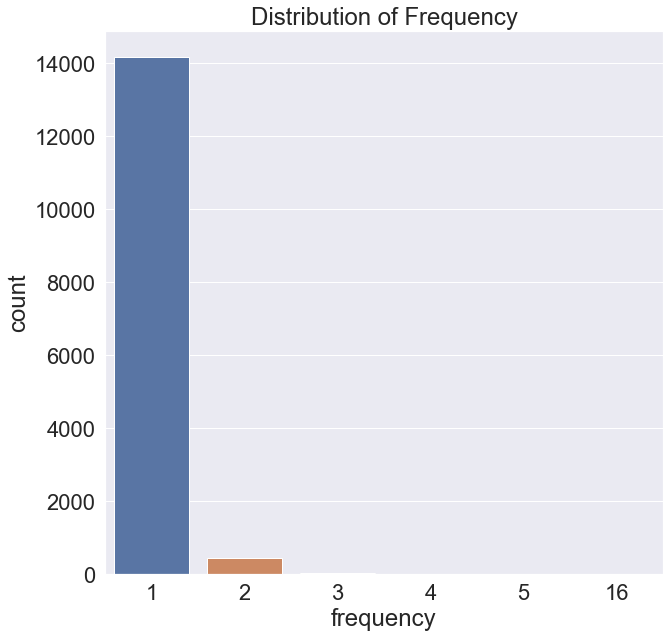

In [48]:
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
plt.title('Distribution of Frequency')
sns.countplot(data=df_rfm,x='frequency')
plt.show()

In [49]:
df_rfm.frequency.value_counts(normalize=True)

1     0.967672
2     0.030351
3     0.001569
5     0.000205
4     0.000136
16    0.000068
Name: frequency, dtype: float64

Dari grafik di atas dapat dilihat bahwa pada frequency 1 ada banyak sekali customerid dengan hanya 1 transaksi. (96 % dari customer base). Hal ini harus diperhatikan oleh team marketing, dan mereka harus menyusun strategy untuk menaikkan Retention dari setiap customer. 

In [50]:
df_rfm_1=df_rfm[df_rfm['frequency']==1]
df_rfm_1.reset_index()

index                customer_unique_id  \
0          0  0004bd2a26a76fe21f786e4fbd80607f   
1          1  000d460961d6dbfa3ec6c9f5805769e1   
2          2  000ed48ceeb6f4bf8ad021a10a3c7b43   
3          3  0010fb34b966d44409382af9e8fd5b77   
4          4  0014a5a58da615f7b01a4f5e194bf5ea   
...      ...                               ...   
14183  14657  ffca77d46c6d7d815549a5e4482dba2f   
14184  14658  ffcd4b43c08405501a6bf2c66be83e83   
14185  14659  ffddff7cfa827d6c430ed9e373be416c   
14186  14660  ffe0c10afc687bcf34a0451f2b87dd9b   
14187  14661  ffe8f2fc0cee48f79934bd2c506fafc0   

                               order_id   price order_delivered_customer_date  \
0      3e470077b690ea3e3d501cffb5e0c499  154.00           2018-04-07 16:12:43   
1      5fd641e5e16c3b056b1fb4dd6e429c43   28.90           2018-01-11 22:20:23   
2      4b2626de72497770ddfa81a533f70c76   12.88           2018-05-22 19:05:25   
3      1fc81b1074b61a259529663946b10a32   49.95           2018-03-28 16:39:11   
4      3eb5983ab1e64ba4a4dd7425a6d6d48b   88.00           2018-01-26 22:38:37   
...                                 ...     ...                           ...   
14183  7d9dad1ac923f80a77b7a8fdd10a7201  141.64                           NaT   
14184  05108247830e6abf604da38aff20907f   22.90           2018-04-25 19:12:14   
14185  2e2dd1119ebf597a9c05d80b5d6eeace   97.00           2017-07-20 16:36:50   
14186  3c21823fb08a6a2ff770877efffb1c1a  179.00           2018-02-18 15:48:56   
14187  ed17f0572bc6ccdacbb220b282a6387c   89.99           2017-08-18 08:53:42   

       frequency  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
14183          1  
14184          1  
14185          1  
14186          1  
14187          1  

[14188 rows x 6 columns]

Kita lakukan pengecekan transaksi terbanyak ada pada bulan dan tahun apa dengan membuat kolom baru dengan tahun dan bulan transaksi.

In [51]:
df_rfm_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14188 entries, 0 to 14661
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             14188 non-null  object        
 1   order_id                       14188 non-null  object        
 2   price                          14188 non-null  float64       
 3   order_delivered_customer_date  14056 non-null  datetime64[ns]
 4   frequency                      14188 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 665.1+ KB


In [52]:
df_rfm_1['month_year']=df_rfm_1['order_delivered_customer_date'].dt.strftime('%Y-%m')
df_rfm_1.reset_index()

<ipython-input-52-fc307bf1fc5e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index                customer_unique_id  \
0          0  0004bd2a26a76fe21f786e4fbd80607f   
1          1  000d460961d6dbfa3ec6c9f5805769e1   
2          2  000ed48ceeb6f4bf8ad021a10a3c7b43   
3          3  0010fb34b966d44409382af9e8fd5b77   
4          4  0014a5a58da615f7b01a4f5e194bf5ea   
...      ...                               ...   
14183  14657  ffca77d46c6d7d815549a5e4482dba2f   
14184  14658  ffcd4b43c08405501a6bf2c66be83e83   
14185  14659  ffddff7cfa827d6c430ed9e373be416c   
14186  14660  ffe0c10afc687bcf34a0451f2b87dd9b   
14187  14661  ffe8f2fc0cee48f79934bd2c506fafc0   

                               order_id   price order_delivered_customer_date  \
0      3e470077b690ea3e3d501cffb5e0c499  154.00           2018-04-07 16:12:43   
1      5fd641e5e16c3b056b1fb4dd6e429c43   28.90           2018-01-11 22:20:23   
2      4b2626de72497770ddfa81a533f70c76   12.88           2018-05-22 19:05:25   
3      1fc81b1074b61a259529663946b10a32   49.95           2018-03-28 16:39:11   
4      3eb5983ab1e64ba4a4dd7425a6d6d48b   88.00           2018-01-26 22:38:37   
...                                 ...     ...                           ...   
14183  7d9dad1ac923f80a77b7a8fdd10a7201  141.64                           NaT   
14184  05108247830e6abf604da38aff20907f   22.90           2018-04-25 19:12:14   
14185  2e2dd1119ebf597a9c05d80b5d6eeace   97.00           2017-07-20 16:36:50   
14186  3c21823fb08a6a2ff770877efffb1c1a  179.00           2018-02-18 15:48:56   
14187  ed17f0572bc6ccdacbb220b282a6387c   89.99           2017-08-18 08:53:42   

       frequency month_year  
0              1    2018-04  
1              1    2018-01  
2              1    2018-05  
3              1    2018-03  
4              1    2018-01  
...          ...        ...  
14183          1        NaN  
14184          1    2018-04  
14185          1    2017-07  
14186          1    2018-02  
14187          1    2017-08  

[14188 rows x 7 columns]

In [53]:
df_rfm_1.groupby('month_year')['price'].count()

month_year
2016-10      19
2016-11       7
2016-12       1
2017-01      39
2017-02     171
2017-03     332
2017-04     226
2017-05     488
2017-06     414
2017-07     456
2017-08     597
2017-09     488
2017-10     585
2017-11     657
2017-12    1059
2018-01     866
2018-02     865
2018-03    1088
2018-04    1128
2018-05    1067
2018-06    1093
2018-07     926
2018-08    1476
2018-09       8
Name: price, dtype: int64

In [54]:
df_rfm_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14188 entries, 0 to 14661
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_unique_id             14188 non-null  object        
 1   order_id                       14188 non-null  object        
 2   price                          14188 non-null  float64       
 3   order_delivered_customer_date  14056 non-null  datetime64[ns]
 4   frequency                      14188 non-null  int64         
 5   month_year                     14056 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 775.9+ KB


In [55]:
new_or_not=df_rfm_1.groupby('month_year')['frequency'].sum()

In [56]:
df_new_or_not=pd.DataFrame(new_or_not)
df_new_or_not.reset_index()

month_year  frequency
0     2016-10         19
1     2016-11          7
2     2016-12          1
3     2017-01         39
4     2017-02        171
5     2017-03        332
6     2017-04        226
7     2017-05        488
8     2017-06        414
9     2017-07        456
10    2017-08        597
11    2017-09        488
12    2017-10        585
13    2017-11        657
14    2017-12       1059
15    2018-01        866
16    2018-02        865
17    2018-03       1088
18    2018-04       1128
19    2018-05       1067
20    2018-06       1093
21    2018-07        926
22    2018-08       1476
23    2018-09          8

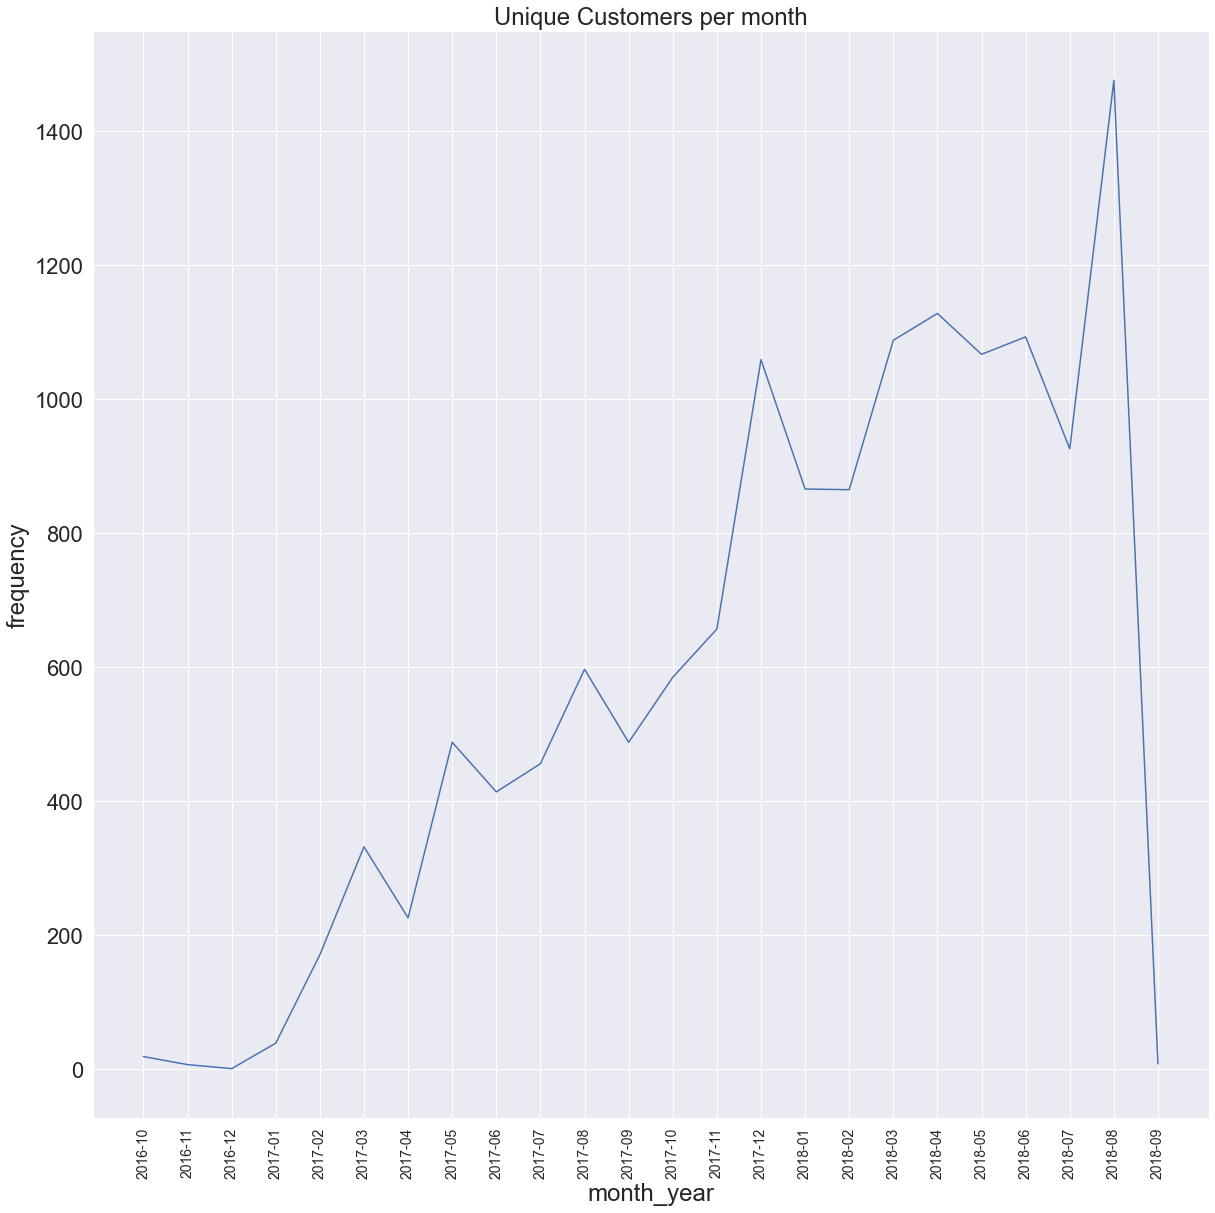

In [57]:
plt.figure(figsize=(20,20))
plt.title("Unique Customers per month")
sns.lineplot(data=df_new_or_not,x='month_year',y='frequency')
plt.xticks(fontsize=14, rotation=90)
plt.show()

AGar grafik dapat lebih terbaca, kita drop untuk row dengan nilai 1, dan untuk customer dengan frequency 1 nantinya akan diberikan nilai frequency 1 pada matrix RFM.

In [58]:
df_rfm_no_1=df_rfm[df_rfm['frequency']!=1]
df_rfm_no_1.reset_index()

index                customer_unique_id  \
0       55  00cc12a6d8b578b8ebd21ea4e2ae8b27   
1       80  012452d40dafae4df401bced74cdb490   
2      107  01886ef98f995e4f2dd75a1d04c97397   
3      166  02b20b7c813efede140142ac610e36dc   
4      183  02e9109b7e0a985108b43e573b6afb23   
..     ...                               ...   
469  14431  fbdd85f919749a8e7a1290c6452024e3   
470  14454  fc719c11b4dce594f47e1f9aa739a3a2   
471  14535  fdb47f6659321662dce6524a8c629d0b   
472  14593  fe81bb32c243a86b2f86fbf053fe6140   
473  14621  ff22e30958c13ffe219db7d711e8f564   

                             order_id    price order_delivered_customer_date  \
0    64307ceb91666760cf3ff463618302fd    99.80           2017-03-28 14:54:11   
1    ce2b4f2836d78829e4796213d536101e  1417.90           2018-05-17 11:35:59   
2    ce8d55aa1c206156fde37e062c716ea2    41.26           2018-03-14 20:56:53   
3    25ce3a22fa2537206c22c8bef4f9b593   172.89           2018-03-26 17:49:09   
4    a7076e7aba13de8b66d95a55811290ed   532.87           2018-05-21 20:32:38   
..                                ...      ...                           ...   
469  09a069fe7d45eae2e1c4910e90e365ac   137.00           2017-06-28 09:13:22   
470  344d7792475d51c5c3b9d41758ef8f44   220.99           2017-12-28 21:34:09   
471  bc5f75667672b3ffd7dd4daea8c408ce   380.64           2017-12-19 19:47:40   
472  4b3c7f8318b056586e0407857f44a136  1535.40           2018-06-25 17:50:47   
473  54282e97f61c23b78330c15b154c867d   290.00                           NaT   

     frequency  
0            2  
1            2  
2            2  
3            2  
4            3  
..         ...  
469          2  
470          3  
471          2  
472          5  
473          2  

[474 rows x 6 columns]

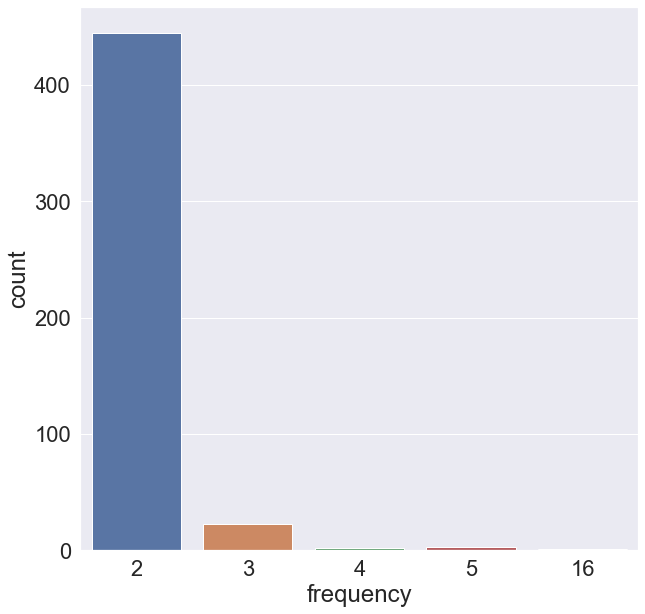

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_rfm_no_1,x='frequency')
plt.show()

Karena hanya ada unique value dengan jumlah transaksi 2,3,4,5,16 untuk customer sao paolo. Maka akan dilakukan penilaian sebagai berikut : 

1. customer dengan frequency pembelian <=2 akan diberikan label frequency 1 
1. customer dengan frequency pembelian 3 akan diberikan label frequency 2
1. customer dengan frequency pembelian 4 akan diberikan label frequency 3
1. customer dengan frequency pembelian <4 akan diberikan label frequency 4

In [60]:
big_df_clean_filtered_combined['frequency']=1
big_df_clean_filtered_combined

order_id                customer_unique_id  \
0      000e63d38ae8c00bbcb5a30573b99628  860fc00d3154ce2346c43ebe47b9b6ce   
1      0011d82c4b53e22e84023405fb467e57  02daaa0e021d624d1784c4ea5cc84ace   
2      001c85b5f68d2be0cb0797afc9e8ce9a  55a269f324455e78349e7b9b7e7e5911   
3      001d8f0e34a38c37f7dba2a37d4eba8b  870a0bdc769f9a7870309036740e79ea   
4      0026a368634b6e6f34f33b1499773a30  2ecb0fc377050ca3b001d3a199e951ec   
...                                 ...                               ...   
15181  ffed7e90414c1477a6b92554661d465f  02fb446e82415f8d22a44a8dd49c1954   
15182  ffef98cd5ecdc992fefbd967549520dd  2c27e67b4518e5db1b0b1faf8fb920c7   
15183  ffefb169ddf34cecc0622a6d3cc387f8  d11fd20c68a7d716b6e2df9bccda5b8e   
15184  fff90cdcb3b2e6cfb397d05d562fd3fe  0e1dad535a5b2359a2ff0a7d475ffb86   
15185  fffce4705a9662cd70adb13d4a31832d  cd79b407828f02fdbba457111c38e4c4   

      customer_city order_status   price order_delivered_customer_date  \
0         sao paulo    delivered   47.90           2018-03-27 14:51:47   
1         sao paulo    delivered  289.00           2018-01-26 22:14:02   
2         sao paulo    delivered   99.00           2017-12-22 18:37:40   
3         sao paulo    delivered   37.98           2017-05-26 13:14:50   
4         sao paulo    delivered  149.00           2017-11-07 21:58:51   
...             ...          ...     ...                           ...   
15181     sao paulo    delivered  149.90           2017-08-14 15:52:37   
15182     sao paulo    delivered  139.90           2017-07-14 16:19:41   
15183     sao paulo    delivered  129.99           2017-07-19 16:36:31   
15184     sao paulo    delivered   89.90           2017-11-29 02:24:25   
15185     sao paulo    delivered   99.90           2017-10-28 12:22:22   

       frequency  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
15181          1  
15182          1  
15183          1  
15184          1  
15185          1  

[15186 rows x 7 columns]

In [61]:
df_rfm=big_df_clean_filtered_combined.groupby(['customer_unique_id']).aggregate({'order_id' : 'first', 'price' : 'sum', 'order_delivered_customer_date' : 'max' ,'frequency' : 'sum'})
df_rfm.reset_index()

customer_unique_id                          order_id  \
0      0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
1      000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
2      000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
3      0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
4      0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
...                                 ...                               ...   
14657  ffca77d46c6d7d815549a5e4482dba2f  7d9dad1ac923f80a77b7a8fdd10a7201   
14658  ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   
14659  ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   
14660  ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a   
14661  ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   

        price order_delivered_customer_date  frequency  
0      154.00           2018-04-07 16:12:43          1  
1       28.90           2018-01-11 22:20:23          1  
2       12.88           2018-05-22 19:05:25          1  
3       49.95           2018-03-28 16:39:11          1  
4       88.00           2018-01-26 22:38:37          1  
...       ...                           ...        ...  
14657  141.64                           NaT          1  
14658   22.90           2018-04-25 19:12:14          1  
14659   97.00           2017-07-20 16:36:50          1  
14660  179.00           2018-02-18 15:48:56          1  
14661   89.99           2017-08-18 08:53:42          1  

[14662 rows x 5 columns]

In [62]:
df_rfm.isnull().sum()

order_id                           0
price                              0
order_delivered_customer_date    134
frequency                          0
dtype: int64

In [63]:
df_rfm[df_rfm['order_delivered_customer_date'].isnull()]

order_id   price  \
customer_unique_id                                                           
0029bd580d3012618731f5abb174a07f  7a43bbe9766ce937332b6f9dcba36715   39.90   
01ea2467bec4e5ba6c007621c7df3bf5  2a06568281fa1a485b9ba5fac48c7df2   49.00   
0311af7210c394f67fdca2a473045be7  c71145d06b89602679deb5e8a297f10b   59.99   
044c97712415505089c9208584c290a8  284e6746559a13cf16f5941bc6872c4a   50.00   
058fdc81abdc81e3668c052fabd4d88b  750fac445e827530d79e0a2050dbcd9c    7.99   
...                                                            ...     ...   
f9ba2cfb1ae12c5c19b625e4b9f88ec6  99b504380657b5d582c36a7748f77842   45.00   
fa1d498401f783dd9c834e1621273e6a  6a6f4f30f771eb3acb7dd11e08a53e00   84.99   
ff22e30958c13ffe219db7d711e8f564  54282e97f61c23b78330c15b154c867d  290.00   
ff5074ba8b01a03882e3935c8c3f5fc9  31b82ff746d73aeab9bc070c10156273   69.90   
ffca77d46c6d7d815549a5e4482dba2f  7d9dad1ac923f80a77b7a8fdd10a7201  141.64   

                                 order_delivered_customer_date  frequency  
customer_unique_id                                                         
0029bd580d3012618731f5abb174a07f                           NaT          1  
01ea2467bec4e5ba6c007621c7df3bf5                           NaT          1  
0311af7210c394f67fdca2a473045be7                           NaT          1  
044c97712415505089c9208584c290a8                           NaT          1  
058fdc81abdc81e3668c052fabd4d88b                           NaT          1  
...                                                        ...        ...  
f9ba2cfb1ae12c5c19b625e4b9f88ec6                           NaT          1  
fa1d498401f783dd9c834e1621273e6a                           NaT          1  
ff22e30958c13ffe219db7d711e8f564                           NaT          2  
ff5074ba8b01a03882e3935c8c3f5fc9                           NaT          1  
ffca77d46c6d7d815549a5e4482dba2f                           NaT          1  

[134 rows x 4 columns]

Untuk missing value ordered deliver akan di drop, karena tidak bisa ditentukan date deliverednya ,jadi kita anggap data ini tidak valid.

In [64]:
df_rfm.dropna(inplace=True)
df_rfm.isna().sum()

order_id                         0
price                            0
order_delivered_customer_date    0
frequency                        0
dtype: int64

In [65]:
df_rfm.reset_index()

customer_unique_id                          order_id  \
0      0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
1      000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
2      000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
3      0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
4      0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
...                                 ...                               ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f  50490daf5089179998f3667fa6cb49a5   
14524  ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   
14525  ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a   
14527  ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   

        price order_delivered_customer_date  frequency  
0      154.00           2018-04-07 16:12:43          1  
1       28.90           2018-01-11 22:20:23          1  
2       12.88           2018-05-22 19:05:25          1  
3       49.95           2018-03-28 16:39:11          1  
4       88.00           2018-01-26 22:38:37          1  
...       ...                           ...        ...  
14523   41.29           2017-11-11 15:43:41          1  
14524   22.90           2018-04-25 19:12:14          1  
14525   97.00           2017-07-20 16:36:50          1  
14526  179.00           2018-02-18 15:48:56          1  
14527   89.99           2017-08-18 08:53:42          1  

[14528 rows x 5 columns]

dari df_rfm kita memiliki data price **(monetary)** , order_delivered_customer_date **(Recency)** dan **Frequency**.
Kita akan menggunakan **Tanggal terahkir + 1 hari** sebagai setpoint awal untuk recency.

In [66]:
df_rfm.describe(include='datetime')

<ipython-input-66-978174fec8aa>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



order_delivered_customer_date
count                          14528
unique                         14502
top              2018-05-08 19:36:48
freq                               3
first            2016-10-13 16:51:46
last             2018-09-17 14:42:46

In [67]:
setpoint=pd.to_datetime(df_rfm.describe(include='datetime').loc['last'], yearfirst=True)+ datetime.timedelta(days=1)
setpoint

<ipython-input-67-feb0820b2778>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



order_delivered_customer_date   2018-09-18 14:42:46
Name: last, dtype: datetime64[ns]

In [68]:
setpoint

order_delivered_customer_date   2018-09-18 14:42:46
Name: last, dtype: datetime64[ns]

Kita lakukan penambahan feature ```day_since_last_purchase``` dengan mengurangi ```setpoint``` dengan ```order_delivered_customer_date``` 

In [69]:
df_rfm['order_delivered_customer_date']=df_rfm['order_delivered_customer_date'].dt.date

In [70]:
df_rfm.reset_index()

customer_unique_id                          order_id  \
0      0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
1      000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
2      000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
3      0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
4      0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
...                                 ...                               ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f  50490daf5089179998f3667fa6cb49a5   
14524  ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   
14525  ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a   
14527  ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   

        price order_delivered_customer_date  frequency  
0      154.00                    2018-04-07          1  
1       28.90                    2018-01-11          1  
2       12.88                    2018-05-22          1  
3       49.95                    2018-03-28          1  
4       88.00                    2018-01-26          1  
...       ...                           ...        ...  
14523   41.29                    2017-11-11          1  
14524   22.90                    2018-04-25          1  
14525   97.00                    2017-07-20          1  
14526  179.00                    2018-02-18          1  
14527   89.99                    2017-08-18          1  

[14528 rows x 5 columns]

In [71]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14528 entries, 0004bd2a26a76fe21f786e4fbd80607f to ffe8f2fc0cee48f79934bd2c506fafc0
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       14528 non-null  object 
 1   price                          14528 non-null  float64
 2   order_delivered_customer_date  14528 non-null  object 
 3   frequency                      14528 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 567.5+ KB


In [72]:
df_rfm['order_delivered_customer_date']=pd.to_datetime(df_rfm['order_delivered_customer_date'])
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14528 entries, 0004bd2a26a76fe21f786e4fbd80607f to ffe8f2fc0cee48f79934bd2c506fafc0
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       14528 non-null  object        
 1   price                          14528 non-null  float64       
 2   order_delivered_customer_date  14528 non-null  datetime64[ns]
 3   frequency                      14528 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 567.5+ KB


In [73]:
df_rfm['day_since_last_purchase']= df_rfm['order_delivered_customer_date'].apply(lambda x : x-setpoint)
df_rfm

order_id   price  \
customer_unique_id                                                           
0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499  154.00   
000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   28.90   
000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   12.88   
0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   49.95   
0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   88.00   
...                                                            ...     ...   
ffc3ea5436ad9c11ee9abdd56b85509f  50490daf5089179998f3667fa6cb49a5   41.29   
ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   22.90   
ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   97.00   
ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a  179.00   
ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   89.99   

                                 order_delivered_customer_date  frequency  \
customer_unique_id                                                          
0004bd2a26a76fe21f786e4fbd80607f                    2018-04-07          1   
000d460961d6dbfa3ec6c9f5805769e1                    2018-01-11          1   
000ed48ceeb6f4bf8ad021a10a3c7b43                    2018-05-22          1   
0010fb34b966d44409382af9e8fd5b77                    2018-03-28          1   
0014a5a58da615f7b01a4f5e194bf5ea                    2018-01-26          1   
...                                                        ...        ...   
ffc3ea5436ad9c11ee9abdd56b85509f                    2017-11-11          1   
ffcd4b43c08405501a6bf2c66be83e83                    2018-04-25          1   
ffddff7cfa827d6c430ed9e373be416c                    2017-07-20          1   
ffe0c10afc687bcf34a0451f2b87dd9b                    2018-02-18          1   
ffe8f2fc0cee48f79934bd2c506fafc0                    2017-08-18          1   

                                 day_since_last_purchase  
customer_unique_id                                        
0004bd2a26a76fe21f786e4fbd80607f     -165 days +09:17:14  
000d460961d6dbfa3ec6c9f5805769e1     -251 days +09:17:14  
000ed48ceeb6f4bf8ad021a10a3c7b43     -120 days +09:17:14  
0010fb34b966d44409382af9e8fd5b77     -175 days +09:17:14  
0014a5a58da615f7b01a4f5e194bf5ea     -236 days +09:17:14  
...                                                  ...  
ffc3ea5436ad9c11ee9abdd56b85509f     -312 days +09:17:14  
ffcd4b43c08405501a6bf2c66be83e83     -147 days +09:17:14  
ffddff7cfa827d6c430ed9e373be416c     -426 days +09:17:14  
ffe0c10afc687bcf34a0451f2b87dd9b     -213 days +09:17:14  
ffe8f2fc0cee48f79934bd2c506fafc0     -397 days +09:17:14  

[14528 rows x 5 columns]

In [74]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14528 entries, 0004bd2a26a76fe21f786e4fbd80607f to ffe8f2fc0cee48f79934bd2c506fafc0
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       14528 non-null  object         
 1   price                          14528 non-null  float64        
 2   order_delivered_customer_date  14528 non-null  datetime64[ns] 
 3   frequency                      14528 non-null  int64          
 4   day_since_last_purchase        14528 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), timedelta64[ns](1)
memory usage: 681.0+ KB


In [75]:
df_rfm['day_since_last_purchase']=df_rfm['day_since_last_purchase'].astype('timedelta64[D]')
df_rfm

order_id   price  \
customer_unique_id                                                           
0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499  154.00   
000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   28.90   
000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   12.88   
0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   49.95   
0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   88.00   
...                                                            ...     ...   
ffc3ea5436ad9c11ee9abdd56b85509f  50490daf5089179998f3667fa6cb49a5   41.29   
ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   22.90   
ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   97.00   
ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a  179.00   
ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   89.99   

                                 order_delivered_customer_date  frequency  \
customer_unique_id                                                          
0004bd2a26a76fe21f786e4fbd80607f                    2018-04-07          1   
000d460961d6dbfa3ec6c9f5805769e1                    2018-01-11          1   
000ed48ceeb6f4bf8ad021a10a3c7b43                    2018-05-22          1   
0010fb34b966d44409382af9e8fd5b77                    2018-03-28          1   
0014a5a58da615f7b01a4f5e194bf5ea                    2018-01-26          1   
...                                                        ...        ...   
ffc3ea5436ad9c11ee9abdd56b85509f                    2017-11-11          1   
ffcd4b43c08405501a6bf2c66be83e83                    2018-04-25          1   
ffddff7cfa827d6c430ed9e373be416c                    2017-07-20          1   
ffe0c10afc687bcf34a0451f2b87dd9b                    2018-02-18          1   
ffe8f2fc0cee48f79934bd2c506fafc0                    2017-08-18          1   

                                  day_since_last_purchase  
customer_unique_id                                         
0004bd2a26a76fe21f786e4fbd80607f                   -165.0  
000d460961d6dbfa3ec6c9f5805769e1                   -251.0  
000ed48ceeb6f4bf8ad021a10a3c7b43                   -120.0  
0010fb34b966d44409382af9e8fd5b77                   -175.0  
0014a5a58da615f7b01a4f5e194bf5ea                   -236.0  
...                                                   ...  
ffc3ea5436ad9c11ee9abdd56b85509f                   -312.0  
ffcd4b43c08405501a6bf2c66be83e83                   -147.0  
ffddff7cfa827d6c430ed9e373be416c                   -426.0  
ffe0c10afc687bcf34a0451f2b87dd9b                   -213.0  
ffe8f2fc0cee48f79934bd2c506fafc0                   -397.0  

[14528 rows x 5 columns]

In [76]:
df_rfm.reset_index()

customer_unique_id                          order_id  \
0      0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
1      000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
2      000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
3      0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
4      0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
...                                 ...                               ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f  50490daf5089179998f3667fa6cb49a5   
14524  ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   
14525  ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a   
14527  ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   

        price order_delivered_customer_date  frequency  \
0      154.00                    2018-04-07          1   
1       28.90                    2018-01-11          1   
2       12.88                    2018-05-22          1   
3       49.95                    2018-03-28          1   
4       88.00                    2018-01-26          1   
...       ...                           ...        ...   
14523   41.29                    2017-11-11          1   
14524   22.90                    2018-04-25          1   
14525   97.00                    2017-07-20          1   
14526  179.00                    2018-02-18          1   
14527   89.99                    2017-08-18          1   

       day_since_last_purchase  
0                       -165.0  
1                       -251.0  
2                       -120.0  
3                       -175.0  
4                       -236.0  
...                        ...  
14523                   -312.0  
14524                   -147.0  
14525                   -426.0  
14526                   -213.0  
14527                   -397.0  

[14528 rows x 6 columns]

># Segmentation RFM

In [77]:
rfm_end=df_rfm.drop(['order_id','order_delivered_customer_date'],axis=1).reset_index()
rfm_end

customer_unique_id   price  frequency  \
0      0004bd2a26a76fe21f786e4fbd80607f  154.00          1   
1      000d460961d6dbfa3ec6c9f5805769e1   28.90          1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43   12.88          1   
3      0010fb34b966d44409382af9e8fd5b77   49.95          1   
4      0014a5a58da615f7b01a4f5e194bf5ea   88.00          1   
...                                 ...     ...        ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f   41.29          1   
14524  ffcd4b43c08405501a6bf2c66be83e83   22.90          1   
14525  ffddff7cfa827d6c430ed9e373be416c   97.00          1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  179.00          1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0   89.99          1   

       day_since_last_purchase  
0                       -165.0  
1                       -251.0  
2                       -120.0  
3                       -175.0  
4                       -236.0  
...                        ...  
14523                   -312.0  
14524                   -147.0  
14525                   -426.0  
14526                   -213.0  
14527                   -397.0  

[14528 rows x 4 columns]

>### Price Column

In [78]:
rfm_end.describe()

price     frequency  day_since_last_purchase
count   14528.000000  14528.000000             14528.000000
mean      171.074436      1.035931              -234.613023
std      1596.274425      0.235730               150.604375
min         2.290000      1.000000              -706.000000
25%        42.900000      1.000000              -336.000000
50%        79.990000      1.000000              -209.000000
75%       149.810000      1.000000              -112.000000
max    162841.500000     16.000000                -2.000000

<AxesSubplot:>

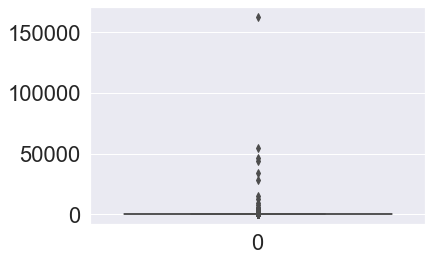

In [79]:
sns.boxplot(data=rfm_end['price'])

Plot tidak dapat terbaca karena outlier yang nilainya terlalu jauh.

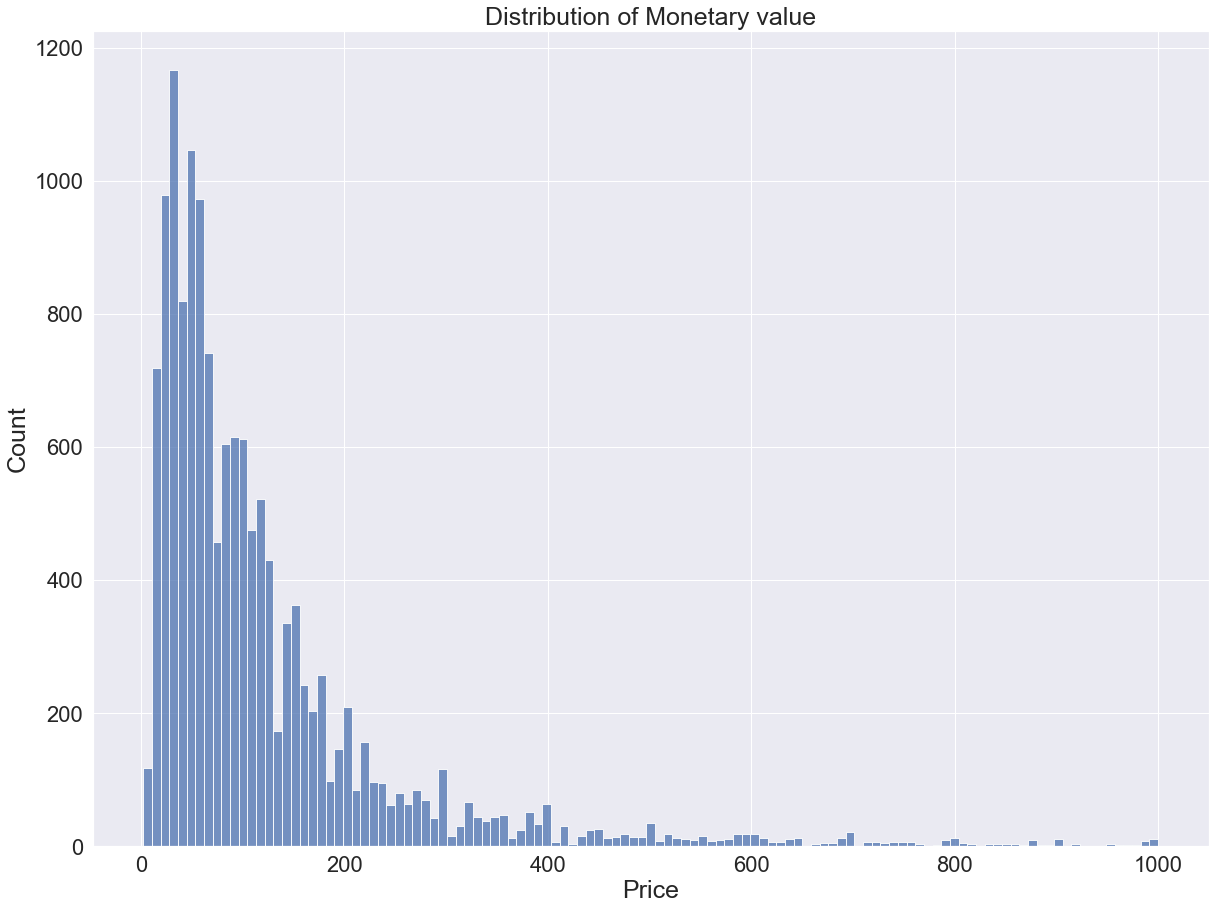

In [80]:
price_check=rfm_end.query('price < 1000')['price']
sns.set(font_scale=2)
plt.figure(figsize=(20,15))
sns.histplot(data=price_check)
plt.title('Distribution of Monetary value',fontdict={'fontsize' : 25})
plt.xlabel('Price',fontdict={'fontsize' : 25})
plt.ylabel('Count',fontdict={'fontsize' : 25})
plt.xticks
plt.show()

In [81]:
rfm_end[['price','frequency','day_since_last_purchase']].describe().loc[['mean','min','25%','50%','75%','max']]

price  frequency  day_since_last_purchase
mean     171.074436   1.035931              -234.613023
min        2.290000   1.000000              -706.000000
25%       42.900000   1.000000              -336.000000
50%       79.990000   1.000000              -209.000000
75%      149.810000   1.000000              -112.000000
max   162841.500000  16.000000                -2.000000

Untuk Scoring Frequency tidak menggunakan data Quartil , karena jumlah frequency 1 terlalu banyak, sehingga nilai semua quartil menjadi 1. 

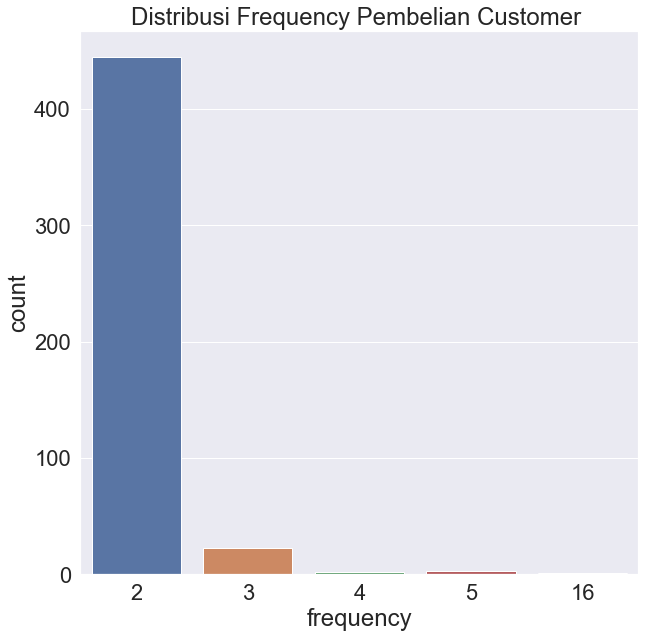

In [82]:
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
plt.title('Distribusi Frequency Pembelian Customer ')
sns.countplot(data=df_rfm_no_1,x='frequency')
plt.show()

Karena hanya ada unique value dengan jumlah transaksi 1,2,3,4,5,16 untuk customer sao paolo. Maka akan dilakukan penilaian sebagai berikut : 

1. customer dengan frequency pembelian <=2 akan diberikan label frequency 1 
1. customer dengan frequency pembelian 3 akan diberikan label frequency 2
1. customer dengan frequency pembelian 4 akan diberikan label frequency 3
1. customer dengan frequency pembelian <4 akan diberikan label frequency 4

## Recency

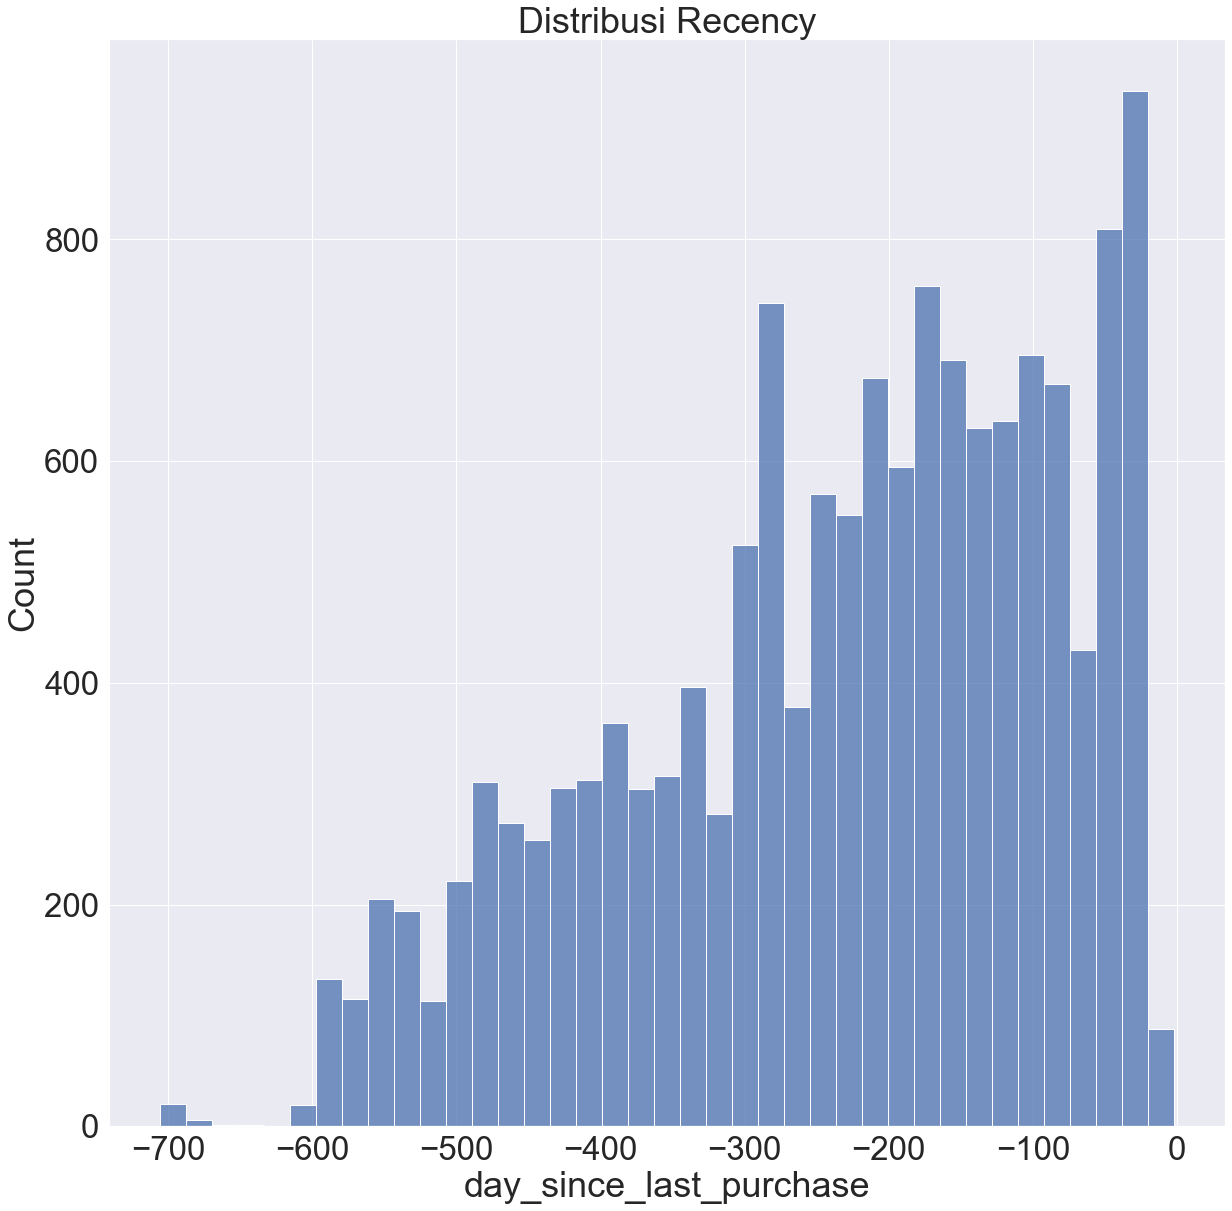

In [83]:
recency_check=rfm_end.query('day_since_last_purchase < 1000')['day_since_last_purchase']
sns.set(font_scale=3)
plt.figure(figsize=(20,20))
sns.histplot(data=recency_check)
plt.title('Distribusi Recency')
plt.show()

Dari Hasil grafik di atas, kebanyakan customer memiliki recency yang tinggi. Hal ini menunjukkan bahwa banyak customer yang masih aktif. Jika dikaitkan

## Monetary

Karena Nilai ```Min``` dan ```Max``` dari kolom Monetary yang terlampu jauh, Kita harus mengurangi range data yang ditampilkan agar grafik dapat terbaca.

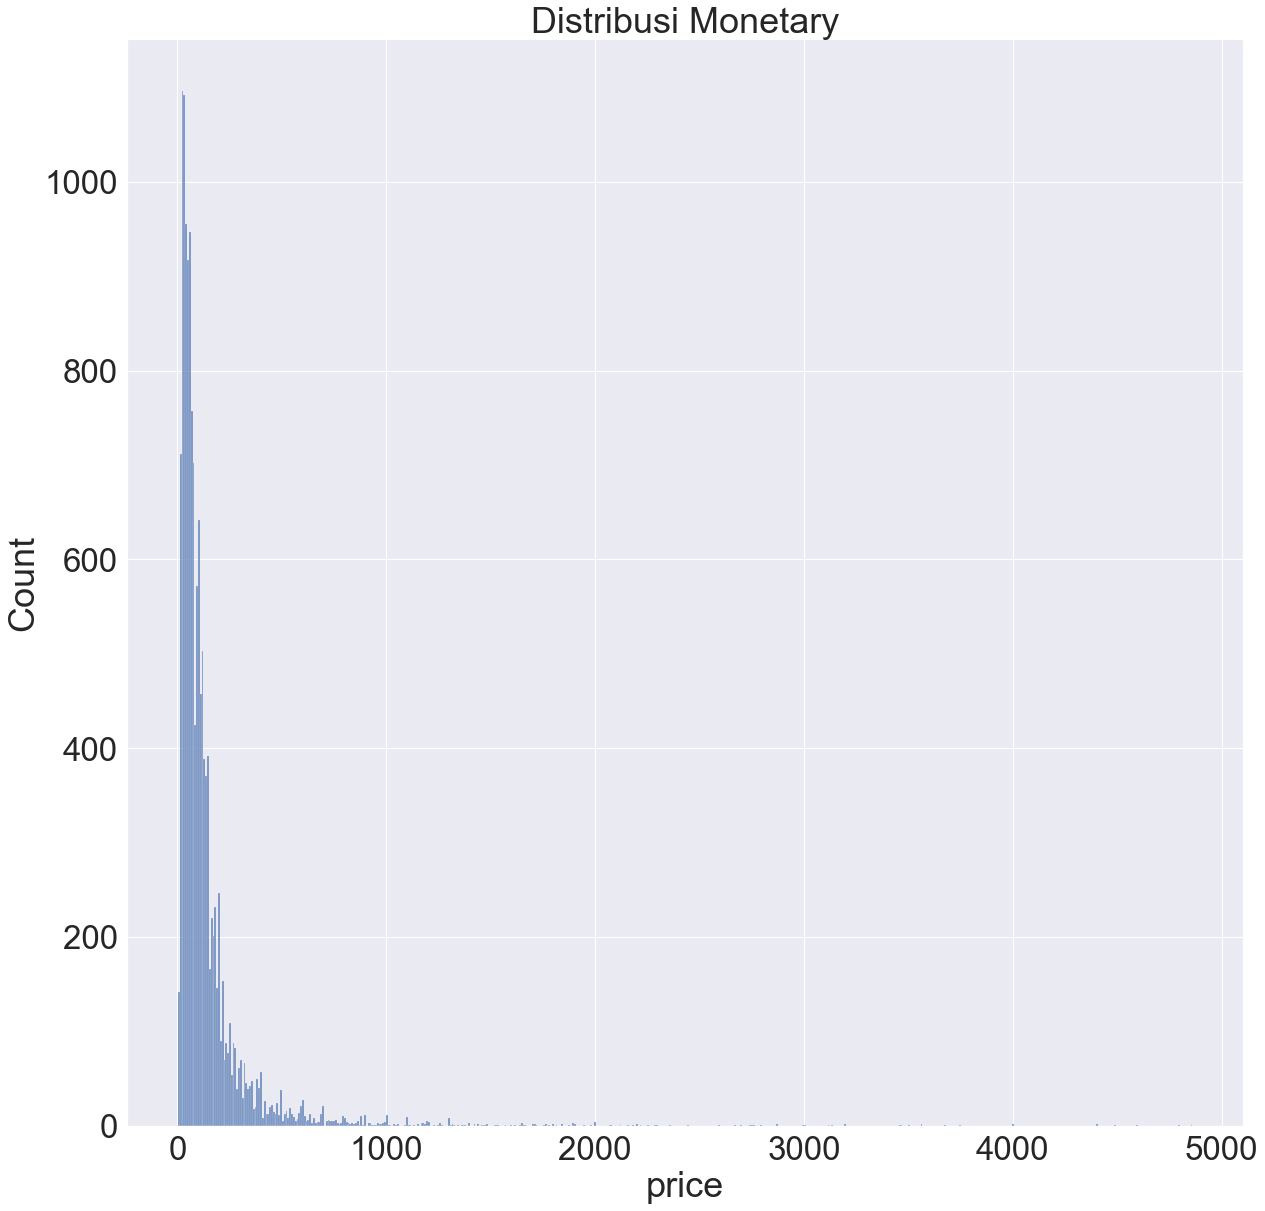

In [84]:
monetary_check=rfm_end.query('price < 5000  ')['price']
sns.set(font_scale=3)
plt.figure(figsize=(20,20))
sns.histplot(data=monetary_check)
plt.title('Distribusi Monetary')
plt.show()

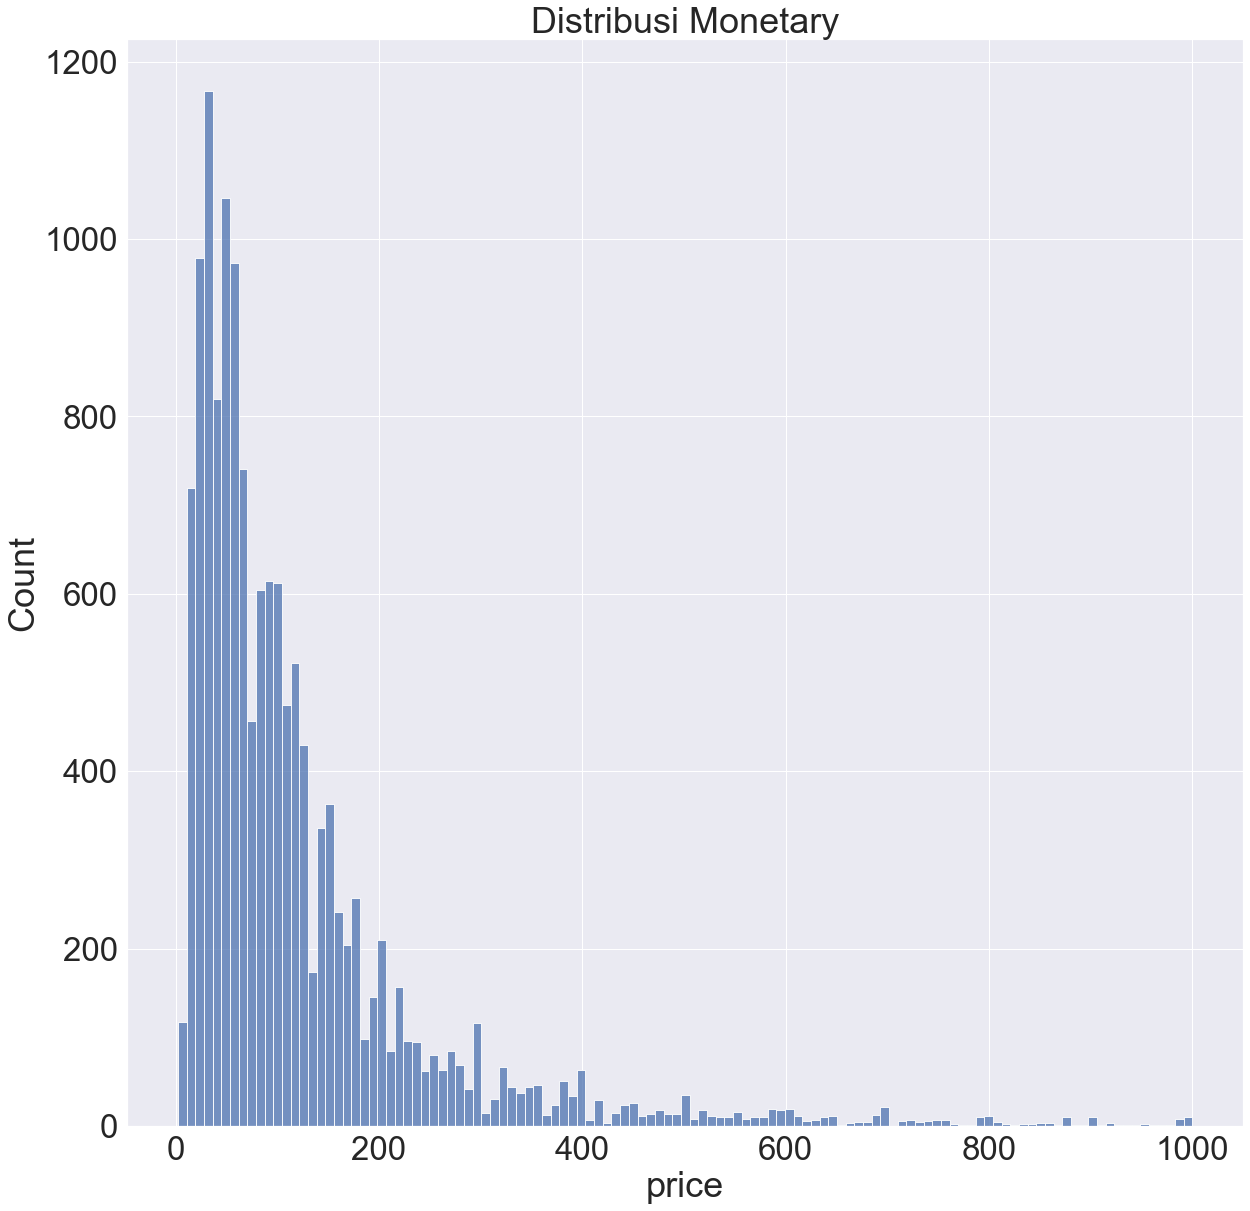

In [85]:
monetary_check=rfm_end.query('price < 1000')['price']
sns.set(font_scale=3)
plt.figure(figsize=(20,20))
sns.histplot(data=monetary_check)
plt.title('Distribusi Monetary')
plt.show()

Karena hanya ada unique value dengan jumlah transaksi 2,3,4,5,16 untuk customer sao paolo. Maka akan dilakukan penilaian sebagai berikut : 

1. customer dengan frequency pembelian <=2 akan diberikan label frequency 1 
1. customer dengan frequency pembelian 3 akan diberikan label frequency 2
1. customer dengan frequency pembelian 4 akan diberikan label frequency 3
1. customer dengan frequency pembelian <4 akan diberikan label frequency 4

>### Defining RFM Metrics

Menurut Arthur Hughes, seharusnya klasifikasi RFM menggunakan binning dengan metode Equal Frequency, tetapi untuk aplikasi pada dataset ini kurang tepat, karena pada kolom ```frequency``` banyak sekali data dengan nilai 1, sehingga akan banyak menghasilkan bins dengan nilai yang sama. Untuk itu, kita akan menggunakan Quartil untuk RFM pada dataset ini.

In [86]:
def rfm_price(x):
    lower_quartil=42.90
    median=79.99
    upper_quartil=149.81
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val

def rfm_freq(x):
    lower_quartil=2
    median=3
    upper_quartil=4
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val
def rfm_recency(x):
    lower_quartil=-336.0
    median=-209.0
    upper_quartil=-112.0
    if x<=lower_quartil:
        val=1
    elif lower_quartil<x<=median:
        val=2
    elif median<x<=upper_quartil:
        val=3
    else:
        val=4
    return val

In [87]:
rfm_class=pd.DataFrame({'Customer ID' : rfm_end['customer_unique_id'], 
                        'recency_score' : rfm_end['day_since_last_purchase'].apply(lambda x : rfm_recency(x)), 
                        'frequency_score' : rfm_end['frequency'].apply(lambda x : rfm_freq(x)),
                       'monetary' : rfm_end['price'].apply(lambda x : rfm_price(x))})
rfm_class

Customer ID  recency_score  frequency_score  \
0      0004bd2a26a76fe21f786e4fbd80607f              3                1   
1      000d460961d6dbfa3ec6c9f5805769e1              2                1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43              3                1   
3      0010fb34b966d44409382af9e8fd5b77              3                1   
4      0014a5a58da615f7b01a4f5e194bf5ea              2                1   
...                                 ...            ...              ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f              2                1   
14524  ffcd4b43c08405501a6bf2c66be83e83              3                1   
14525  ffddff7cfa827d6c430ed9e373be416c              1                1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b              2                1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0              1                1   

       monetary  
0             4  
1             1  
2             1  
3             2  
4             3  
...         ...  
14523         1  
14524         1  
14525         3  
14526         4  
14527         3  

[14528 rows x 4 columns]

In [88]:
rfm_class.to_csv('./csv/ending_rfm_class.csv')

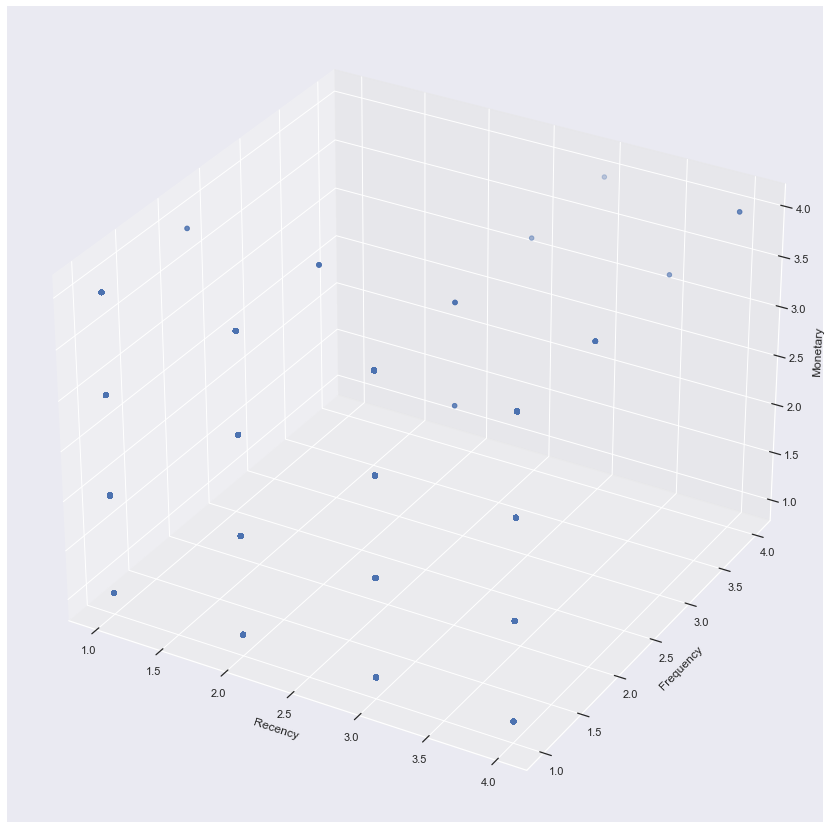

In [89]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

x = rfm_class['recency_score']
y = rfm_class['frequency_score']
z = rfm_class['monetary']

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

ax.scatter(x, y, z)

plt.show()

In [90]:
rfm_class['rfm_score']=rfm_class['recency_score'].map(str)+ rfm_class['frequency_score'].map(str) +rfm_class['monetary'].map(str)
rfm_class

Customer ID  recency_score  frequency_score  \
0      0004bd2a26a76fe21f786e4fbd80607f              3                1   
1      000d460961d6dbfa3ec6c9f5805769e1              2                1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43              3                1   
3      0010fb34b966d44409382af9e8fd5b77              3                1   
4      0014a5a58da615f7b01a4f5e194bf5ea              2                1   
...                                 ...            ...              ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f              2                1   
14524  ffcd4b43c08405501a6bf2c66be83e83              3                1   
14525  ffddff7cfa827d6c430ed9e373be416c              1                1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b              2                1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0              1                1   

       monetary rfm_score  
0             4       314  
1             1       211  
2             1       311  
3             2       312  
4             3       213  
...         ...       ...  
14523         1       211  
14524         1       311  
14525         3       113  
14526         4       214  
14527         3       113  

[14528 rows x 5 columns]

>## Approaches

Kita akan menggunakan 2 Approach untuk menghadapi customer segmentation ini : 
1. K means clustering dengan RFM
1. K-means clustering tanpa RFM

>## K-means Clustering dengan RFM Matrix

Pertama kita lakukan K means clustering dengan RFM yang sudah dibuat sesuai klasifikasi

In [91]:
rfm_class

Customer ID  recency_score  frequency_score  \
0      0004bd2a26a76fe21f786e4fbd80607f              3                1   
1      000d460961d6dbfa3ec6c9f5805769e1              2                1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43              3                1   
3      0010fb34b966d44409382af9e8fd5b77              3                1   
4      0014a5a58da615f7b01a4f5e194bf5ea              2                1   
...                                 ...            ...              ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f              2                1   
14524  ffcd4b43c08405501a6bf2c66be83e83              3                1   
14525  ffddff7cfa827d6c430ed9e373be416c              1                1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b              2                1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0              1                1   

       monetary rfm_score  
0             4       314  
1             1       211  
2             1       311  
3             2       312  
4             3       213  
...         ...       ...  
14523         1       211  
14524         1       311  
14525         3       113  
14526         4       214  
14527         3       113  

[14528 rows x 5 columns]

In [92]:
X=rfm_class.drop(['Customer ID','rfm_score'],axis=1)
X

recency_score  frequency_score  monetary
0                  3                1         4
1                  2                1         1
2                  3                1         1
3                  3                1         2
4                  2                1         3
...              ...              ...       ...
14523              2                1         1
14524              3                1         1
14525              1                1         3
14526              2                1         4
14527              1                1         3

[14528 rows x 3 columns]

In [93]:
kmeans=KMeans(n_clusters=4,random_state=2021,n_jobs=-1)
model_cluster4=kmeans.fit(X)

C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).



Kita Lakukan Pengecekan Silhouette Score

In [94]:
silhouette = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,random_state=2021,n_jobs=-1)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels, metric='euclidean'))


C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\Users\findi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning:

'n_jobs' was d

In [95]:
silhouette

[0.3959919739863229,
 0.43457851693234706,
 0.5316410864871921,
 0.5031734879539891,
 0.5215848618650435,
 0.5472747633248951,
 0.5939443544543932,
 0.5911926824202614,
 0.6408023402334656,
 0.7152668363545892,
 0.7527093201653497,
 0.8154252840036247,
 0.8743320063751547,
 0.9356069329743281,
 0.9958414785799984,
 0.997159230103142,
 0.9980624617567839,
 0.9987022288146079]

Bisa dilakukan pengecekan jumlah cluster berdasarkan Silhouette Scorenya

C:\Users\findi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\findi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



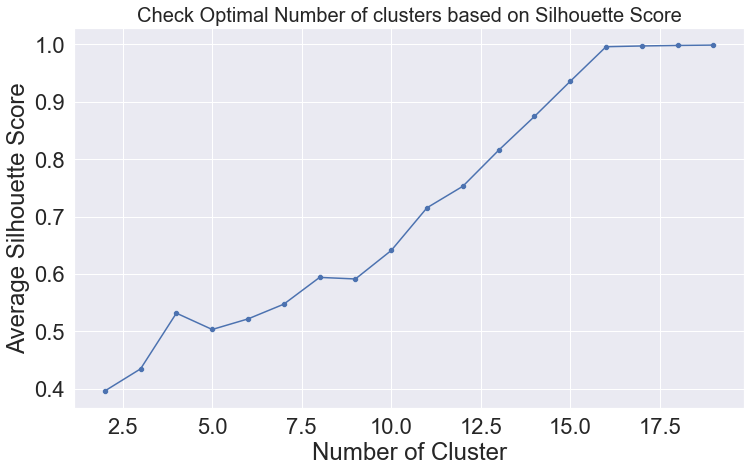

In [96]:
sns.set(font_scale=2)
plt.figure(figsize=(12,7))
sns.lineplot(range(2,20), silhouette)
sns.scatterplot(range(2,20), silhouette)
plt.title('Check Optimal Number of clusters based on Silhouette Score',{'fontsize' :20})
plt.xlabel('Number of Cluster')
plt.ylabel('Average Silhouette Score')
plt.show()

Kita lakukan juga pengecekan dengan Elbow Method

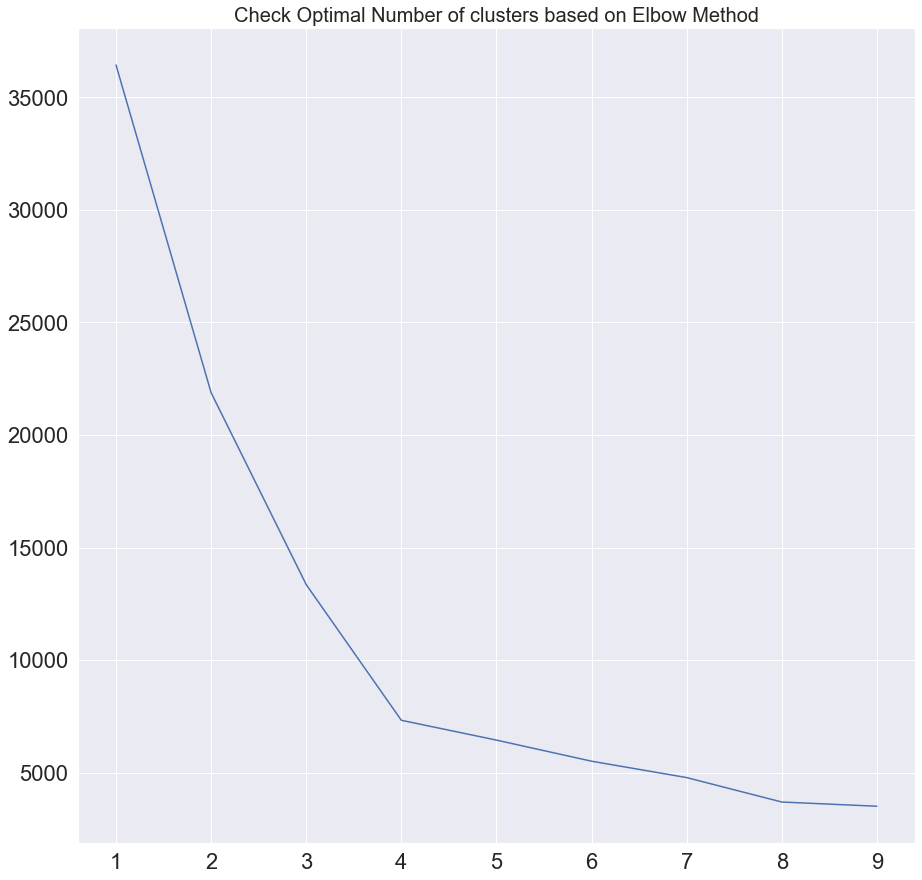

In [263]:
# sum of squared distances
%matplotlib inline
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters,random_state=2021)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)
plt.figure(figsize=(15,15))
plt.plot(list(range(1,10)), ssd)
plt.title('Check Optimal Number of clusters based on Elbow Method',fontdict= {'fontsize' : 20})
# plt.xticks(range(1,10), )
# plt.xtick_labels(range(1,10))
plt.show()

Dengan menggunakan elbow method , dapat dilihat bahwa mulai dari ```n_clusters = 4``` perubahan nilai similarity menjadi insignificant. Oleh karena itu , bisa digunakan ```n_clusters = 4``` 

In [98]:
## hasil klasifikasi k-means dengan n-cluster=4
rfm_class_kmeans_k4 = pd.concat([rfm_class,pd.Series(model_cluster4.labels_)],axis=1)
rfm_class_kmeans_k4.columns=['customer_unique_id','recency','frequency','monetary','RFM_score','ClusterID']
rfm_class_kmeans_k4

customer_unique_id  recency  frequency  monetary  \
0      0004bd2a26a76fe21f786e4fbd80607f        3          1         4   
1      000d460961d6dbfa3ec6c9f5805769e1        2          1         1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43        3          1         1   
3      0010fb34b966d44409382af9e8fd5b77        3          1         2   
4      0014a5a58da615f7b01a4f5e194bf5ea        2          1         3   
...                                 ...      ...        ...       ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f        2          1         1   
14524  ffcd4b43c08405501a6bf2c66be83e83        3          1         1   
14525  ffddff7cfa827d6c430ed9e373be416c        1          1         3   
14526  ffe0c10afc687bcf34a0451f2b87dd9b        2          1         4   
14527  ffe8f2fc0cee48f79934bd2c506fafc0        1          1         3   

      RFM_score  ClusterID  
0           314          2  
1           211          0  
2           311          3  
3           312          3  
4           213          1  
...         ...        ...  
14523       211          0  
14524       311          3  
14525       113          1  
14526       214          1  
14527       113          1  

[14528 rows x 6 columns]

In [99]:
rfm_class_kmeans_k4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  14528 non-null  object
 1   recency             14528 non-null  int64 
 2   frequency           14528 non-null  int64 
 3   monetary            14528 non-null  int64 
 4   RFM_score           14528 non-null  object
 5   ClusterID           14528 non-null  int32 
dtypes: int32(1), int64(3), object(2)
memory usage: 624.4+ KB


In [100]:
rfm_class_kmeans_k4['ClusterID'].value_counts()

0    3664
2    3633
3    3623
1    3608
Name: ClusterID, dtype: int64

In [101]:
rfm_class_kmeans_k4_plotting=rfm_class_kmeans_k4
rfm_class_kmeans_k4_plotting['ClusterID']=rfm_class_kmeans_k4_plotting['ClusterID'].map(str)
rfm_class_kmeans_k4_plotting

customer_unique_id  recency  frequency  monetary  \
0      0004bd2a26a76fe21f786e4fbd80607f        3          1         4   
1      000d460961d6dbfa3ec6c9f5805769e1        2          1         1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43        3          1         1   
3      0010fb34b966d44409382af9e8fd5b77        3          1         2   
4      0014a5a58da615f7b01a4f5e194bf5ea        2          1         3   
...                                 ...      ...        ...       ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f        2          1         1   
14524  ffcd4b43c08405501a6bf2c66be83e83        3          1         1   
14525  ffddff7cfa827d6c430ed9e373be416c        1          1         3   
14526  ffe0c10afc687bcf34a0451f2b87dd9b        2          1         4   
14527  ffe8f2fc0cee48f79934bd2c506fafc0        1          1         3   

      RFM_score ClusterID  
0           314         2  
1           211         0  
2           311         3  
3           312         3  
4           213         1  
...         ...       ...  
14523       211         0  
14524       311         3  
14525       113         1  
14526       214         1  
14527       113         1  

[14528 rows x 6 columns]

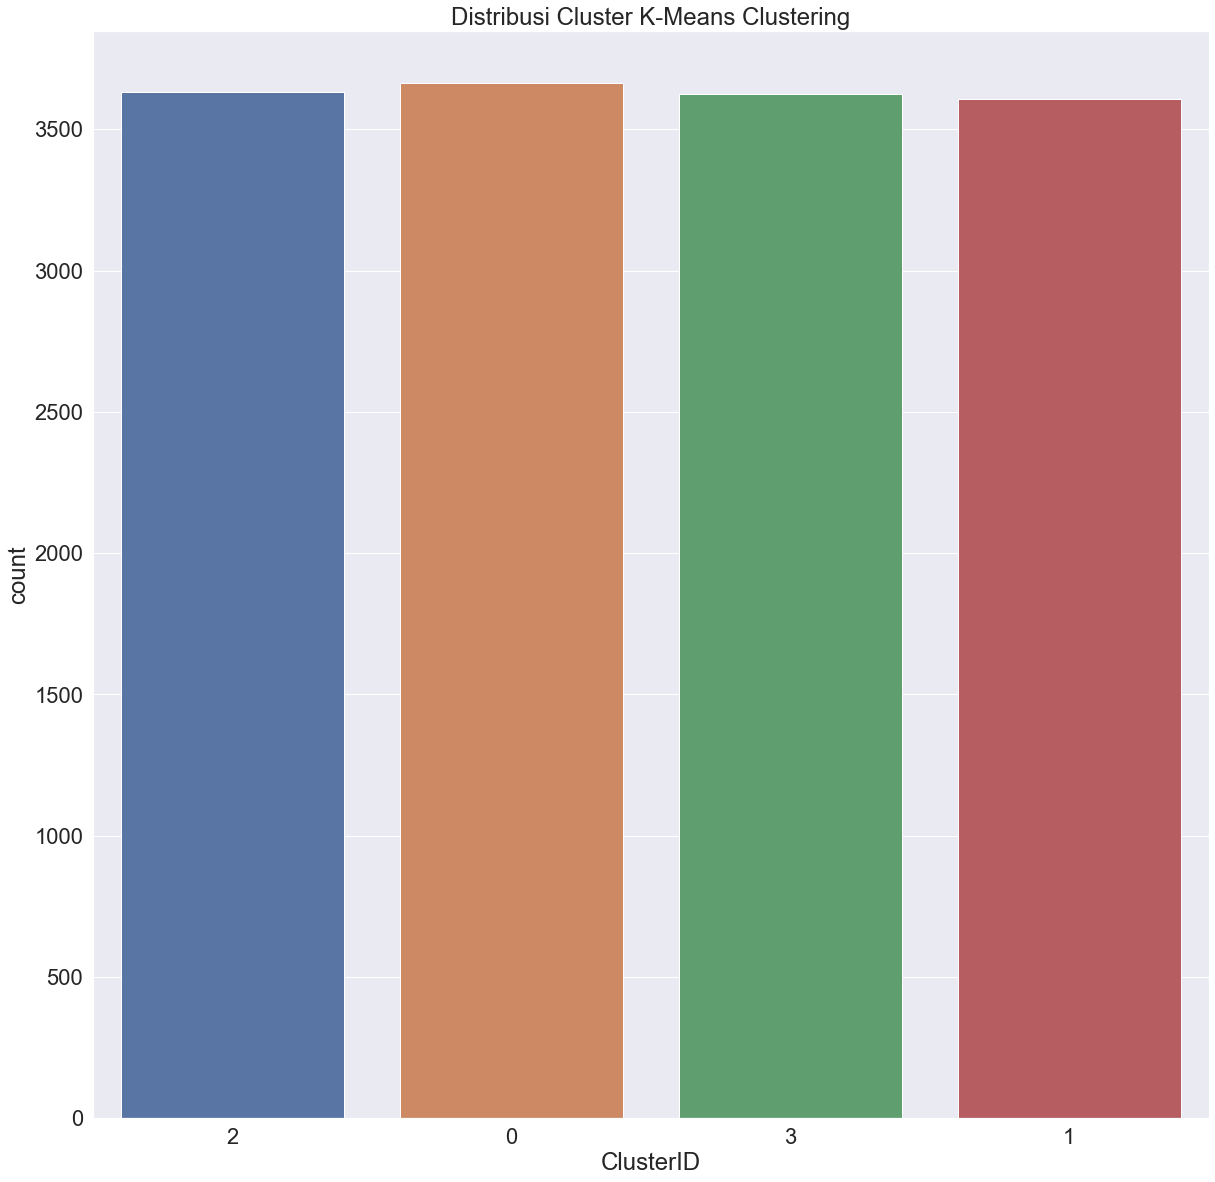

In [102]:
plt.figure(figsize=(20,20))
plt.title('Distribusi Cluster K-Means Clustering')
sns.countplot(data=rfm_class_kmeans_k4_plotting,x='ClusterID')
plt.show()

Hasil Countplot menunjukkan bahwa Cluster Terbagi dengan frequensi yang sama

Plot 3D dengan spesifikasi sebagai berikut : 
1. recency = x
2. frequency = y
3. monetary = z
4. hue = clusterID

In [103]:
fig = px.scatter_3d(rfm_class_kmeans_k4_plotting,
                   x='recency',
                    y='frequency',
                    z='monetary',
                    color='ClusterID'
                   )
fig.show()

In [104]:
%matplotlib inline
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency -->'),yaxis = dict(title  = 'frequency--->'),zaxis = dict(title  = 'monetary-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model_cluster4.labels_
trace = go.Scatter3d(x=rfm_class_kmeans_k4.loc[:,'recency'], 
                     y=rfm_class_kmeans_k4.loc[:,'frequency'], 
                     z=rfm_class_kmeans_k4.loc[:, 'monetary'], 
                     mode='markers',
                     showlegend=True,
                     marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),
                   scene = Scene,
                   height = 800,
                   width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [105]:
df_rfm.reset_index()

customer_unique_id                          order_id  \
0      0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
1      000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
2      000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
3      0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
4      0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
...                                 ...                               ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f  50490daf5089179998f3667fa6cb49a5   
14524  ffcd4b43c08405501a6bf2c66be83e83  05108247830e6abf604da38aff20907f   
14525  ffddff7cfa827d6c430ed9e373be416c  2e2dd1119ebf597a9c05d80b5d6eeace   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  3c21823fb08a6a2ff770877efffb1c1a   
14527  ffe8f2fc0cee48f79934bd2c506fafc0  ed17f0572bc6ccdacbb220b282a6387c   

        price order_delivered_customer_date  frequency  \
0      154.00                    2018-04-07          1   
1       28.90                    2018-01-11          1   
2       12.88                    2018-05-22          1   
3       49.95                    2018-03-28          1   
4       88.00                    2018-01-26          1   
...       ...                           ...        ...   
14523   41.29                    2017-11-11          1   
14524   22.90                    2018-04-25          1   
14525   97.00                    2017-07-20          1   
14526  179.00                    2018-02-18          1   
14527   89.99                    2017-08-18          1   

       day_since_last_purchase  
0                       -165.0  
1                       -251.0  
2                       -120.0  
3                       -175.0  
4                       -236.0  
...                        ...  
14523                   -312.0  
14524                   -147.0  
14525                   -426.0  
14526                   -213.0  
14527                   -397.0  

[14528 rows x 6 columns]

In [106]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14528 entries, 0004bd2a26a76fe21f786e4fbd80607f to ffe8f2fc0cee48f79934bd2c506fafc0
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       14528 non-null  object        
 1   price                          14528 non-null  float64       
 2   order_delivered_customer_date  14528 non-null  datetime64[ns]
 3   frequency                      14528 non-null  int64         
 4   day_since_last_purchase        14528 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 681.0+ KB


In [107]:
## kita concate cluster yang ada dengan rfm yang belum diberi label class
df_rfm_class_kmeans_k4=pd.concat([rfm_end,pd.Series(model_cluster4.labels_)],axis=1)
df_rfm_class_kmeans_k4.columns=['customer_unique_id','monetary','frequency','recency','ClusterID']
df_rfm_class_kmeans_k4

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              2  
1              0  
2              3  
3              3  
4              1  
...          ...  
14523          0  
14524          3  
14525          1  
14526          1  
14527          1  

[14528 rows x 5 columns]

In [108]:
df_rfm_class_kmeans_k4.to_csv('./csv/df_rfm_class_kmeans_k4.csv',index=False)
cekcsv=pd.read_csv('./csv/df_rfm_class_kmeans_k4.csv')
cekcsv

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              2  
1              0  
2              3  
3              3  
4              1  
...          ...  
14523          0  
14524          3  
14525          1  
14526          1  
14527          1  

[14528 rows x 5 columns]

In [109]:
%matplotlib qt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for clustname in df_rfm_class_kmeans_k4.ClusterID.unique():
    ax.scatter(df_rfm_class_kmeans_k4.recency[df_rfm_class_kmeans_k4.ClusterID==clustname], ## sumbu X
               df_rfm_class_kmeans_k4.frequency[df_rfm_class_kmeans_k4.ClusterID==clustname], ## Sumbu y
               df_rfm_class_kmeans_k4.monetary[df_rfm_class_kmeans_k4.ClusterID==clustname], ## sumbu z
               label=clustname)
ax.legend()
plt.show()

In [110]:
%matplotlib inline
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency -->'),yaxis = dict(title  = 'frequency--->'),zaxis = dict(title  = 'monetary-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model_cluster4.labels_
trace = go.Scatter3d(x=df_rfm_class_kmeans_k4.loc[:,'recency'], y=df_rfm_class_kmeans_k4.loc[:,'frequency'], z=df_rfm_class_kmeans_k4.loc[:, 'monetary'], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

kita lakukan pengecekan stats untuk tiap cluster.

In [115]:
%matplotlib inline
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency -->'),yaxis = dict(title  = 'frequency--->'),zaxis = dict(title  = 'monetary-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model_cluster4.labels_
trace = go.Scatter3d(x=df_rfm_class_kmeans_k4_kurang10k.loc[:,'recency'],
                     y=df_rfm_class_kmeans_k4_kurang10k.loc[:,'frequency'], 
                     z=df_rfm_class_kmeans_k4_kurang10k.loc[:, 'monetary'], 
                     mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [116]:
df_rfm_class_kmeans_k4_monetary=pd.DataFrame(df_rfm_class_kmeans_k4.groupby(['ClusterID']).monetary.median())
df_rfm_class_kmeans_k4_frequency=pd.DataFrame(df_rfm_class_kmeans_k4.groupby(['ClusterID']).frequency.median())
df_rfm_class_kmeans_k4_recency=pd.DataFrame(df_rfm_class_kmeans_k4.groupby(['ClusterID']).recency.median())

In [117]:
df_rfm_class_kmeans_k4_median= pd.concat([pd.Series([0,1,2,3]), 
                                        df_rfm_class_kmeans_k4_monetary, 
                                        df_rfm_class_kmeans_k4_frequency, 
                                        df_rfm_class_kmeans_k4_recency], axis=1)
df_rfm_class_kmeans_k4_median.columns = ["ClusterID", "monetary_median", "frequency_median", "recency_median"]
df_rfm_class_kmeans_k4_median

ClusterID  monetary_median  frequency_median  recency_median
0          0            43.99                 1          -341.0
1          1           149.90                 1          -331.0
2          2           149.00                 1          -118.0
3          3            42.00                 1          -107.0

Jika digunakan median, maka frequency akan menjadi tampak seperti tidak ada beda, padahal dalam data ada perbedaan antar clusterID. Kita coba lihat mean dari masing masing feature.

In [118]:
df_rfm_class_kmeans_k4_monetary=pd.DataFrame(df_rfm_class_kmeans_k4.groupby(['ClusterID']).monetary.mean())
df_rfm_class_kmeans_k4_frequency=pd.DataFrame(df_rfm_class_kmeans_k4.groupby(['ClusterID']).frequency.mean())
df_rfm_class_kmeans_k4_recency=pd.DataFrame(df_rfm_class_kmeans_k4.groupby(['ClusterID']).recency.mean())

In [119]:
df_rfm_class_kmeans_k4_median= pd.concat([pd.Series([0,1,2,3]), 
                                        df_rfm_class_kmeans_k4_monetary, 
                                        df_rfm_class_kmeans_k4_frequency, 
                                        df_rfm_class_kmeans_k4_recency], axis=1)
df_rfm_class_kmeans_k4_median.columns = ["ClusterID", "monetary_mean", "frequency_mean", "recency_mean"]
df_rfm_class_kmeans_k4_median

ClusterID  monetary_mean  frequency_mean  recency_mean
0          0      43.941635        1.007096   -360.977347
1          1     352.513711        1.054878   -355.393570
2          2     246.308555        1.073493   -112.540600
3          3      43.516092        1.008556   -108.947557

- Untuk Urutan Monetary (Dari tertinggi sampai terendah) :
1. Class 1 
1. Class 2 
1. Class 3 
1. Class 0

Antara mean dan median urutan tetap sama.

- Untuk Urutan Frequency (Dari tertinggi sampai terendah) :

1. Class 2
1. Class 1
1. Class 3
1. Class 0

Untuk median, tidak bisa memisahkan perbedaan mean, karena data 1 terlalu banyak sehingga semua kuartilnya bernilai 1.

- Untuk Urutan Recency

1. Class 3
1. Class 2 
1. Class 1 
1. Class 0

## Cluster Describing
Dari hasil clustering , dapat dilihat bahwa Cluster ID adalah sebagai berikut : 
-  ### Cluster 0 (Low Value, Churned)
    - Memiliki nilai monetery rendah , Frequency yang rendah , dan Recency yang rendah.
        - Dari metric di atas dapat disimpulkan bahwa customer cluster 0 pernah menggunakan , tapi tidak puas dengan ecommerce Olist , sehingga tidak menggunakan lagi. (Sudah Churn dan tidak puas)
    - Strategi yang bisa diimplementasikan : 
        1. Tidak membuang terlalu banyak sumber daya untuk cluster ini.
        2. Meminta feedback, untuk melihat kenapa tidak puas dengan pelayanan E-Commerce.
        
        
- ### Cluster 1  (High Value, Churned)
    - Memiliki nilai montary tinggi , nilai frequensi yang relatif tinggi, dan recency yang sudah lama.
        - Dari metric di atas , dapat disimpulkan bahwa customer cluster 1 pernah menggunakan, cukup puas (terbukti dari frequensi transaksi yang cukup sering) , tapi nilai recency yang rendah menunjukkan bahwa customer cluster 0 sudah lama tidak bertransaksi , dan sudah tidak menggunakan.(Puas, tapi Sudah Churn). 
    - Strategi yang bisa diimplementasikan : 
        1. Meski sulit untuk ditarik karena sudah churn, Customer ini memiliki value yang tinggi sehingga kita bisa berusaha menarik cluster ini kembali dengan memberi Special offer agar mau menggunakan E-Commerce lagi.
        2. Meminta feedback, untuk melihat kenapa tidak puas dengan pelayanan E-Commerce.  
        3. Melihat historical strategy marketing pada customer di segment ini , dan melakukan evaluasi kesalahan yang dilakukan.
    
- ### Cluster 2 (High Value Active)
    - Memiliki nilai monetary ,frequensi yang paling tinggi, dan Recency yang kedua tertinggi. 
        - Dari metric di atas, dapat disimpulkan bahwa customer cluster 2 merupakan customer aktif yang memiliki nilai transaksi tinggi dan juga sering melakukan transaksi. Customer pada cluster 2 ini dapat dicategorykan sebagai **"Spender"** atau customer yang harus dijaga. Customer pada cluster ini adalah customer yang paling berharga.
    - Strategi yang bisa diimplementasikan : 
        1. Beri mereka insentif untuk terus melakukan engagement dengan E-commerce, bisa melalui loyalty program. 
        1. Pada Customer cluster ini , bisa meminta review produk , agar bisa menginfluence orang orang di sekitar mereka dan menarik customer baru.
        1. Customer cluster ini merupakan customer yang sudah sering membeli barang dengan monetary value yang tinggi pada E-commerce. Bisa dipertimbangkan untuk tidak memberi diskon pada customer segmen ini , karena mereka sudah setia dengan brand.
        1. Bisa memberikan Personal Reccomendation berdasarkan historical pembelian , karena customer pada cluster ini mememiliki kemungkinan untuk merespon rekomendasi dengan baik.
- ### Cluster 3 (Potential Customer) 
    - Memiliki nilai monetary dan frequensi yang rendah, tetapi memiliki recency yang tertinggi.
        - Dari metric di atas , dapat disimpulkan bahwa customer cluster 3 merupakan customer yang baru mulai menggunakan E-commerce Olist. (Potential Customer) Customer pada cluster 3 sebaiknya juga perhatikan supaya dia tetap engaged dengan layanan e-commerce Olist.
    - Strategi yang bisa diimplementasikan : 
        1. Pada customer segment ini , bisa dibuatkan loyalty program , dan memberi insentif untuk transaksi yang lebih besar / lebih sering untuk membangun habit untuk menggunakan E-commerce.


    

>## Further EDA

In [192]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [160]:
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [161]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [162]:
translate

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [194]:
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

Kita lakukan Merge untuk data yang diperlukan.

In [193]:
cat_check=orders.merge(order_items,on='order_id',how='inner')
cat_check

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
112645    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
112646    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
112647    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112648    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112645          2018-02-07 23:22:42           2018-02-28 17:37:56   
112646          2017-08-28 20:52:26           2017-09-21 11:24:17   
112647          2018-01-12 15:35:03           2018-01-25 23:32:54   
112648          2018-01-12 15:35:03           2018-01-25 23:32:54   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2018-08-13 00:00:00              1   
2                2018-09-04 00:00:00              1   
3                2017-12-15 00:00:00              1   
4                2018-02-26 00:00:00              1   
...                              ...            ...   
112645           2018-03-02 00:00:00              1   
112646           2017-09-27 00:00:00              1   
112647           2018-02-15 00:00:00              1   
112648           2018-02-15 00:00:00              2   
112649           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
112645  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
112646  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
112647  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [164]:
cat_check_item=cat_check['order_id customer_id product_id'.split()]
cat_check_item

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

                              product_id  
0       87285b34884572647811a353c7ac498a  
1       595fac2a385ac33a80bd5114aec74eb8  
2       aa4383b373c6aca5d8797843e5594415  
3       d0b61bfb1de832b15ba9d266ca96e5b0  
4       65266b2da20d04dbe00c5c2d3bb7859e  
...                                  ...  
112645  f1d4ce8c6dd66c47bbaa8c6781c2a923  
112646  b80910977a37536adeddd63663f916ad  
112647  d1c427060a0f73f6b889a5c7c61f2ac4  
112648  d1c427060a0f73f6b889a5c7c61f2ac4  
112649  006619bbed68b000c8ba3f8725d5409e  

[112650 rows x 3 columns]

In [168]:
cat_check_item=cat_check_item.merge(products,on='product_id')
cat_check_item=cat_check_item['order_id customer_id product_id product_category_name'.split()]
cat_check_item

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                  ...                               ...   
112645  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
112646  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
112647  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
112648  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

                              product_id  product_category_name  
0       87285b34884572647811a353c7ac498a  utilidades_domesticas  
1       87285b34884572647811a353c7ac498a  utilidades_domesticas  
2       87285b34884572647811a353c7ac498a  utilidades_domesticas  
3       87285b34884572647811a353c7ac498a  utilidades_domesticas  
4       595fac2a385ac33a80bd5114aec74eb8             perfumaria  
...                                  ...                    ...  
112645  0df37da38a30a713453b03053d60d3f7          esporte_lazer  
112646  0df37da38a30a713453b03053d60d3f7          esporte_lazer  
112647  3d2c44374ee42b3003a470f3e937a2ea  instrumentos_musicais  
112648  ac35486adb7b02598c182c2ff2e05254           beleza_saude  
112649  006619bbed68b000c8ba3f8725d5409e           beleza_saude  

[112650 rows x 4 columns]

In [195]:
cat_check_item_english=cat_check_item.merge(translate,on='product_category_name',how='right')
cat_check_item_english

order_id                       customer_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
1       d30680568af2e9f0aeba3420292df26d  8eb5e45df7b0f27cc1a3b7ba46219180   
2       b87c9466fb7a6b04a632222b07c1922d  f69987b9f125768a2cf3243679536a80   
3       04031be66943a9c385ff683fcc99d288  b9313515b2c2bfce4c61816d2b0b9217   
4       f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
...                                  ...                               ...   
111018  b99217b1fcf2fdeace7b8d869b76cb91  8325d6e7af2f2bfb58cf040729b232dd   
111019  3da4b0f0c89bb8fee8a810459e641414  2415312e36eac3ab3819f5b7f32522e5   
111020  ee86b68eb9222b0cad7da50f4f758a35  14acb30bbc064408dcb8cdd3c92b0c97   
111021  2c4ada2e75c2ad41dd93cebb5df5f023  363d3a9b2ec5c5426608688ca033292d   
111022  bede3503afed051733eeb4a84d1adcc5  919570a26efbd068d6a0f66d5c5072a3   

                              product_id          product_category_name  \
0       5ac9d9e379c606e36a8094a6046f75dc                   beleza_saude   
1       5ac9d9e379c606e36a8094a6046f75dc                   beleza_saude   
2       5ac9d9e379c606e36a8094a6046f75dc                   beleza_saude   
3       5ac9d9e379c606e36a8094a6046f75dc                   beleza_saude   
4       2b4609f8948be18874494203496bc318                   beleza_saude   
...                                  ...                            ...   
111018  57bdf3098169cccdb62221bd3e089cbd  fashion_roupa_infanto_juvenil   
111019  28ac6af4008a402e5039f3e042a36e13  fashion_roupa_infanto_juvenil   
111020  0ab3ab3b2869073aa9afe795fe9151aa  fashion_roupa_infanto_juvenil   
111021  6c7a0a349ad11817745e3ad58abd5c79             seguros_e_servicos   
111022  8db75af9aed3315374db44d7860e25da             seguros_e_servicos   

       product_category_name_english  
0                      health_beauty  
1                      health_beauty  
2                      health_beauty  
3                      health_beauty  
4                      health_beauty  
...                              ...  
111018     fashion_childrens_clothes  
111019     fashion_childrens_clothes  
111020     fashion_childrens_clothes  
111021         security_and_services  
111022         security_and_services  

[111023 rows x 5 columns]

In [196]:
cat_check_item_english=cat_check_item_english['order_id customer_id product_id product_category_name_english'.split()]
cat_check_item_english

order_id                       customer_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
1       d30680568af2e9f0aeba3420292df26d  8eb5e45df7b0f27cc1a3b7ba46219180   
2       b87c9466fb7a6b04a632222b07c1922d  f69987b9f125768a2cf3243679536a80   
3       04031be66943a9c385ff683fcc99d288  b9313515b2c2bfce4c61816d2b0b9217   
4       f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
...                                  ...                               ...   
111018  b99217b1fcf2fdeace7b8d869b76cb91  8325d6e7af2f2bfb58cf040729b232dd   
111019  3da4b0f0c89bb8fee8a810459e641414  2415312e36eac3ab3819f5b7f32522e5   
111020  ee86b68eb9222b0cad7da50f4f758a35  14acb30bbc064408dcb8cdd3c92b0c97   
111021  2c4ada2e75c2ad41dd93cebb5df5f023  363d3a9b2ec5c5426608688ca033292d   
111022  bede3503afed051733eeb4a84d1adcc5  919570a26efbd068d6a0f66d5c5072a3   

                              product_id product_category_name_english  
0       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
1       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
2       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
3       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
4       2b4609f8948be18874494203496bc318                 health_beauty  
...                                  ...                           ...  
111018  57bdf3098169cccdb62221bd3e089cbd     fashion_childrens_clothes  
111019  28ac6af4008a402e5039f3e042a36e13     fashion_childrens_clothes  
111020  0ab3ab3b2869073aa9afe795fe9151aa     fashion_childrens_clothes  
111021  6c7a0a349ad11817745e3ad58abd5c79         security_and_services  
111022  8db75af9aed3315374db44d7860e25da         security_and_services  

[111023 rows x 4 columns]

In [197]:
cat_check_item_english=cat_check_item_english.merge(customers,on='customer_id')
cat_check_item_english

order_id                       customer_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
1       d30680568af2e9f0aeba3420292df26d  8eb5e45df7b0f27cc1a3b7ba46219180   
2       b87c9466fb7a6b04a632222b07c1922d  f69987b9f125768a2cf3243679536a80   
3       04031be66943a9c385ff683fcc99d288  b9313515b2c2bfce4c61816d2b0b9217   
4       f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
...                                  ...                               ...   
111018  9fa3a005f89a187501fa1bd63d6125fb  85485f38b20ed1e287120d30cf39ee7d   
111019  3da4b0f0c89bb8fee8a810459e641414  2415312e36eac3ab3819f5b7f32522e5   
111020  ee86b68eb9222b0cad7da50f4f758a35  14acb30bbc064408dcb8cdd3c92b0c97   
111021  2c4ada2e75c2ad41dd93cebb5df5f023  363d3a9b2ec5c5426608688ca033292d   
111022  bede3503afed051733eeb4a84d1adcc5  919570a26efbd068d6a0f66d5c5072a3   

                              product_id product_category_name_english  \
0       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
1       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
2       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
3       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
4       2b4609f8948be18874494203496bc318                 health_beauty   
...                                  ...                           ...   
111018  57bdf3098169cccdb62221bd3e089cbd     fashion_childrens_clothes   
111019  28ac6af4008a402e5039f3e042a36e13     fashion_childrens_clothes   
111020  0ab3ab3b2869073aa9afe795fe9151aa     fashion_childrens_clothes   
111021  6c7a0a349ad11817745e3ad58abd5c79         security_and_services   
111022  8db75af9aed3315374db44d7860e25da         security_and_services   

                      customer_unique_id  customer_zip_code_prefix  \
0       d699688533772c15a061e8ce81cb56df                      4001   
1       dcf468beeda4b0ec3079e3e6b462fa51                     41650   
2       2a7afe87962d34ed975f90f50eb1da13                     25635   
3       96531ad02ee61b808945fbf64e8905d8                     21555   
4       68954feaafe4dd638f3bd3e2afa174ec                      8473   
...                                  ...                       ...   
111018  f979a07fc18b2af3780a796ba14b96f4                      4271   
111019  1f83c87997168e248ea52ad3453b069f                      4128   
111020  1b553902a5bbe6ee54a3aaa7cbfb6816                     26255   
111021  d8bee9ec375c3a0f9ef8ed7456a51dcd                     76940   
111022  141e824b8e0df709e3fcf6d982225a8e                     71940   

         customer_city customer_state  
0            sao paulo             SP  
1             salvador             BA  
2           petropolis             RJ  
3       rio de janeiro             RJ  
4            sao paulo             SP  
...                ...            ...  
111018       sao paulo             SP  
111019       sao paulo             SP  
111020     nova iguacu             RJ  
111021  rolim de moura             RO  
111022        brasilia             DF  

[111023 rows x 8 columns]

In [199]:
cat_check_item_english=cat_check_item_english[['order_id','customer_unique_id','product_id','product_category_name_english']]
cat_check_item_english

order_id                customer_unique_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d699688533772c15a061e8ce81cb56df   
1       d30680568af2e9f0aeba3420292df26d  dcf468beeda4b0ec3079e3e6b462fa51   
2       b87c9466fb7a6b04a632222b07c1922d  2a7afe87962d34ed975f90f50eb1da13   
3       04031be66943a9c385ff683fcc99d288  96531ad02ee61b808945fbf64e8905d8   
4       f848643eec1d69395095eb3840d2051e  68954feaafe4dd638f3bd3e2afa174ec   
...                                  ...                               ...   
111018  9fa3a005f89a187501fa1bd63d6125fb  f979a07fc18b2af3780a796ba14b96f4   
111019  3da4b0f0c89bb8fee8a810459e641414  1f83c87997168e248ea52ad3453b069f   
111020  ee86b68eb9222b0cad7da50f4f758a35  1b553902a5bbe6ee54a3aaa7cbfb6816   
111021  2c4ada2e75c2ad41dd93cebb5df5f023  d8bee9ec375c3a0f9ef8ed7456a51dcd   
111022  bede3503afed051733eeb4a84d1adcc5  141e824b8e0df709e3fcf6d982225a8e   

                              product_id product_category_name_english  
0       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
1       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
2       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
3       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty  
4       2b4609f8948be18874494203496bc318                 health_beauty  
...                                  ...                           ...  
111018  57bdf3098169cccdb62221bd3e089cbd     fashion_childrens_clothes  
111019  28ac6af4008a402e5039f3e042a36e13     fashion_childrens_clothes  
111020  0ab3ab3b2869073aa9afe795fe9151aa     fashion_childrens_clothes  
111021  6c7a0a349ad11817745e3ad58abd5c79         security_and_services  
111022  8db75af9aed3315374db44d7860e25da         security_and_services  

[111023 rows x 4 columns]

In [202]:
cat_check_item_english_filtered=pd.merge(cat_check_item_english,df_rfm_class_kmeans_k4,on='customer_unique_id',how='left')
cat_check_item_english_filtered

order_id                customer_unique_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d699688533772c15a061e8ce81cb56df   
1       d30680568af2e9f0aeba3420292df26d  dcf468beeda4b0ec3079e3e6b462fa51   
2       b87c9466fb7a6b04a632222b07c1922d  2a7afe87962d34ed975f90f50eb1da13   
3       04031be66943a9c385ff683fcc99d288  96531ad02ee61b808945fbf64e8905d8   
4       f848643eec1d69395095eb3840d2051e  68954feaafe4dd638f3bd3e2afa174ec   
...                                  ...                               ...   
111018  9fa3a005f89a187501fa1bd63d6125fb  f979a07fc18b2af3780a796ba14b96f4   
111019  3da4b0f0c89bb8fee8a810459e641414  1f83c87997168e248ea52ad3453b069f   
111020  ee86b68eb9222b0cad7da50f4f758a35  1b553902a5bbe6ee54a3aaa7cbfb6816   
111021  2c4ada2e75c2ad41dd93cebb5df5f023  d8bee9ec375c3a0f9ef8ed7456a51dcd   
111022  bede3503afed051733eeb4a84d1adcc5  141e824b8e0df709e3fcf6d982225a8e   

                              product_id product_category_name_english  \
0       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
1       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
2       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
3       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
4       2b4609f8948be18874494203496bc318                 health_beauty   
...                                  ...                           ...   
111018  57bdf3098169cccdb62221bd3e089cbd     fashion_childrens_clothes   
111019  28ac6af4008a402e5039f3e042a36e13     fashion_childrens_clothes   
111020  0ab3ab3b2869073aa9afe795fe9151aa     fashion_childrens_clothes   
111021  6c7a0a349ad11817745e3ad58abd5c79         security_and_services   
111022  8db75af9aed3315374db44d7860e25da         security_and_services   

        monetary  frequency  recency  ClusterID  
0         109.90        1.0   -345.0        1.0  
1            NaN        NaN      NaN        NaN  
2            NaN        NaN      NaN        NaN  
3            NaN        NaN      NaN        NaN  
4          79.99        1.0   -184.0        3.0  
...          ...        ...      ...        ...  
111018     39.99        1.0   -338.0        0.0  
111019    110.00        1.0   -463.0        1.0  
111020       NaN        NaN      NaN        NaN  
111021       NaN        NaN      NaN        NaN  
111022       NaN        NaN      NaN        NaN  

[111023 rows x 8 columns]

Ketika data di merge , akan ada value NaN, karena pada ```df_rfm_class_kmeans_k4``` hanya mengandung data delivered dari Sao Paolo. Untuk data-data NaN akan kita drop dengan ```.dropna```

In [203]:
cat_check_item_english_filtered.dropna(inplace=True)
cat_check_item_english_filtered

order_id                customer_unique_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d699688533772c15a061e8ce81cb56df   
4       f848643eec1d69395095eb3840d2051e  68954feaafe4dd638f3bd3e2afa174ec   
6       f93af565de05d2427790ad8d0368a80e  0be176523405976a37488ad6a2b81031   
14      67b2034550d68134bdb9bac8c1988c39  c30772dc02e182f555db4b042efdb110   
31      231f7e18395c045198f74f63e3cad304  ec5cb2f49e18391a52f4cd8bcdf4a5de   
...                                  ...                               ...   
111005  d7d414c8d4fa226d73dfedec8607deda  ca50114b5c62d7b1c5c8eb202f1e4ac5   
111008  7001c5d40dac04eddedef23c5d003e44  53da718da35e7a7e14ab628c0c240c41   
111016  cb53f0b6e8f9082a9f5a113765dd1236  e4469e5047c00b0188885853d357d2ab   
111018  9fa3a005f89a187501fa1bd63d6125fb  f979a07fc18b2af3780a796ba14b96f4   
111019  3da4b0f0c89bb8fee8a810459e641414  1f83c87997168e248ea52ad3453b069f   

                              product_id product_category_name_english  \
0       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
4       2b4609f8948be18874494203496bc318                 health_beauty   
6       2b4609f8948be18874494203496bc318                 health_beauty   
14      2b4609f8948be18874494203496bc318                 health_beauty   
31      2b4609f8948be18874494203496bc318                 health_beauty   
...                                  ...                           ...   
111005  8323a7adeb57da21acea7e83563bed90           diapers_and_hygiene   
111008  8323a7adeb57da21acea7e83563bed90           diapers_and_hygiene   
111016  8cfc3506cedc0626364457d254429118     fashion_childrens_clothes   
111018  57bdf3098169cccdb62221bd3e089cbd     fashion_childrens_clothes   
111019  28ac6af4008a402e5039f3e042a36e13     fashion_childrens_clothes   

        monetary  frequency  recency  ClusterID  
0         109.90        1.0   -345.0        1.0  
4          79.99        1.0   -184.0        3.0  
6          79.99        1.0   -106.0        3.0  
14         79.99        1.0   -183.0        3.0  
31         89.99        1.0   -440.0        1.0  
...          ...        ...      ...        ...  
111005     37.00        1.0   -100.0        3.0  
111008     37.00        1.0   -107.0        3.0  
111016     89.99        1.0   -106.0        2.0  
111018     39.99        1.0   -338.0        0.0  
111019    110.00        1.0   -463.0        1.0  

[17171 rows x 8 columns]

In [205]:
cat_check_item_english_filtered_0=cat_check_item_english_filtered[cat_check_item_english_filtered['ClusterID']==0]
cat_check_item_english_filtered_0

order_id                customer_unique_id  \
304     e87fe257e39252f5ed241bcb6222d2f7  89fc88eb69c9a0b0f71febf7c7495ecb   
327     0ec20e561e76d49aa3ca434872643de2  f64aac8b568b587bc2133ba53c8a5cfb   
328     7cf0a314b3b759a5b27f4a0348de6556  661ea2d486e19c9bc3ebe14defadce5b   
343     9aeecc9e1b5dc77872bddd35b141fd83  c7121b2b9e81d55122e3d7a0e2b4202e   
344     b69246cbe19ece82f41f3343cb25999c  d888af68574687ee61490379f13f687f   
...                                  ...                               ...   
110868  40eca6a07bc5b53e520eb20f2d83997c  e8b370122395d9979a0d319db8dbdfcb   
110918  c27941f0a7135ca5f13f3c07ea6b1d28  a4b1f228f759c39008a45d610484d475   
110925  c9b32e9554b777f810bdc8c33940c026  40de78e4a77f3e6d5fdf4c5ba07809ee   
110950  79b5579acdaecb745610365f3f181fce  61a7c7a2d1ee1715b63e0d22a1129fc5   
111018  9fa3a005f89a187501fa1bd63d6125fb  f979a07fc18b2af3780a796ba14b96f4   

                              product_id product_category_name_english  \
304     5e2ba75ad255ff60b1c76c5bf526ae9b                 health_beauty   
327     154e7e31ebfa092203795c972e5804a6                 health_beauty   
328     154e7e31ebfa092203795c972e5804a6                 health_beauty   
343     154e7e31ebfa092203795c972e5804a6                 health_beauty   
344     154e7e31ebfa092203795c972e5804a6                 health_beauty   
...                                  ...                           ...   
110868  c9316b04fcac70510dfc554e184e35f8                  dvds_blu_ray   
110918  c7db7a06c8b856703729c5f1b2a29378                  dvds_blu_ray   
110925  74356542db3483a78a8ba69f5b7ea094                       flowers   
110950  be0e6c61c2bcdd9a4d022ba67fd66189                       flowers   
111018  57bdf3098169cccdb62221bd3e089cbd     fashion_childrens_clothes   

        monetary  frequency  recency  ClusterID  
304        69.90        1.0   -421.0        0.0  
327        23.99        1.0   -327.0        0.0  
328        19.99        1.0   -462.0        0.0  
343        23.99        1.0   -296.0        0.0  
344        23.99        1.0   -315.0        0.0  
...          ...        ...      ...        ...  
110868     19.90        1.0   -488.0        0.0  
110918     16.90        1.0   -404.0        0.0  
110925     59.90        1.0   -301.0        0.0  
110950     65.90        1.0   -220.0        0.0  
111018     39.99        1.0   -338.0        0.0  

[3938 rows x 8 columns]

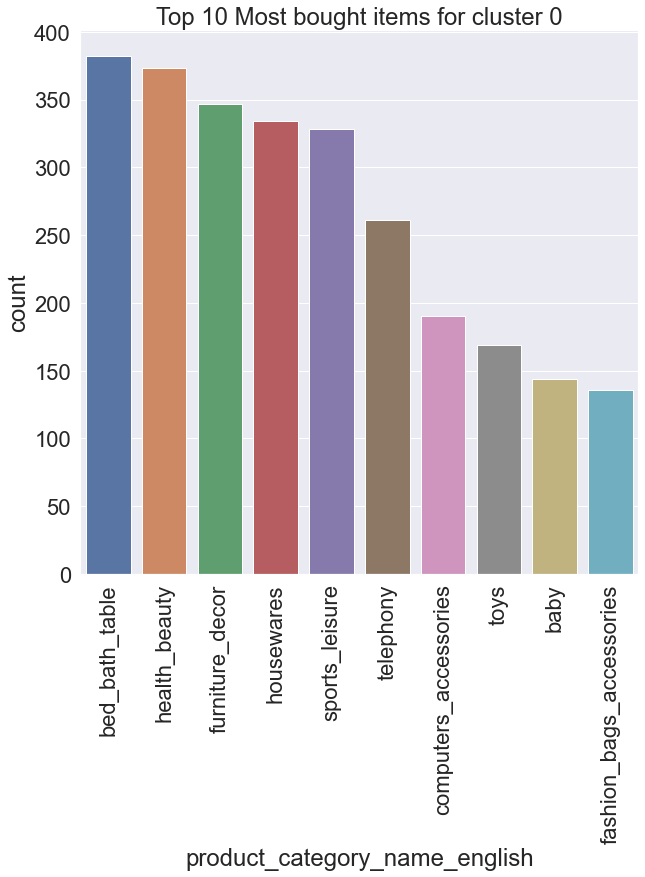

In [218]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Most bought items for cluster 0')
sns.countplot(data=cat_check_item_english_filtered_0,
              x='product_category_name_english',
              order=cat_check_item_english_filtered_0.product_category_name_english.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

In [206]:
cat_check_item_english_filtered_1=cat_check_item_english_filtered[cat_check_item_english_filtered['ClusterID']==1]
cat_check_item_english_filtered_1

order_id                customer_unique_id  \
0       203096f03d82e0dffbc41ebc2e2bcfb7  d699688533772c15a061e8ce81cb56df   
31      231f7e18395c045198f74f63e3cad304  ec5cb2f49e18391a52f4cd8bcdf4a5de   
37      dede3c730917196be4447afe5e985528  12b62a8d3c4911b9a80b935037842fc0   
50      fc8fa04a6621b92f945b8d0224feac74  4bdc9a280b4488f012fc46108b82b700   
63      79b3ba7b7296b5c683e4ec7b173e4020  9c4b6000c2b7f75753909d232d8e9bbd   
...                                  ...                               ...   
110671  8229a9e93c5278241e605ea0b839e262  e5dbadbefe0f605247783729ac5cd901   
110769  8ed355f30b1d3d5b82be51adbccdf067  0fa6f1ec825308a8d4a9d64453979829   
110884  ae5176160fcc23563149dd28b4137b6d  79fe0e57517b5148b07e5d8645eb5095   
110902  10870ce1b8fbb2c59df2c544b74d1b54  7b3a9396e5e5750ee23a07ee6e78c107   
111019  3da4b0f0c89bb8fee8a810459e641414  1f83c87997168e248ea52ad3453b069f   

                              product_id product_category_name_english  \
0       5ac9d9e379c606e36a8094a6046f75dc                 health_beauty   
31      2b4609f8948be18874494203496bc318                 health_beauty   
37      2b4609f8948be18874494203496bc318                 health_beauty   
50      2b4609f8948be18874494203496bc318                 health_beauty   
63      2b4609f8948be18874494203496bc318                 health_beauty   
...                                  ...                           ...   
110671  1f5f0f003ce8595ad88fb215ec1409e6                    cine_photo   
110769  19de58ea609a59ce31f93672af50c09a                home_comfort_2   
110884  47d52bb24ef8a3aa09724f00604be3ba                  dvds_blu_ray   
110902  e96dedd143090ade72c86bf486be7d36                  dvds_blu_ray   
111019  28ac6af4008a402e5039f3e042a36e13     fashion_childrens_clothes   

        monetary  frequency  recency  ClusterID  
0         109.90        1.0   -345.0        1.0  
31         89.99        1.0   -440.0        1.0  
37        188.99        2.0   -302.0        1.0  
50         89.99        1.0   -364.0        1.0  
63         89.99        1.0   -436.0        1.0  
...          ...        ...      ...        ...  
110671     99.99        1.0   -252.0        1.0  
110769    219.99        1.0   -531.0        1.0  
110884   1420.00        1.0   -525.0        1.0  
110902    699.00        1.0   -424.0        1.0  
111019    110.00        1.0   -463.0        1.0  

[4549 rows x 8 columns]

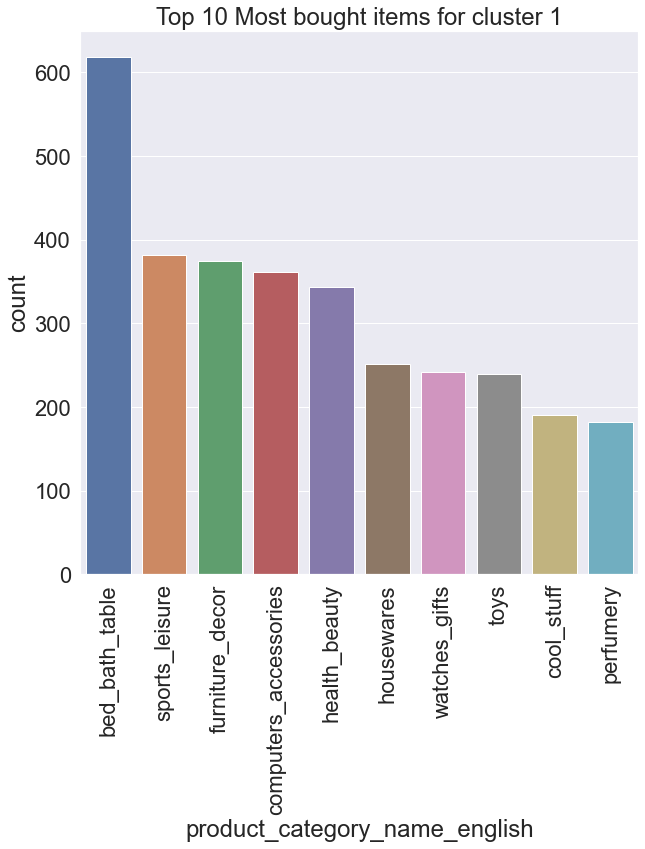

In [217]:
plt.figure(figsize=(10,10))
plt.title('Top 10 Most bought items for cluster 1')
sns.countplot(data=cat_check_item_english_filtered_1,
              x='product_category_name_english',
              order=cat_check_item_english_filtered_1.product_category_name_english.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

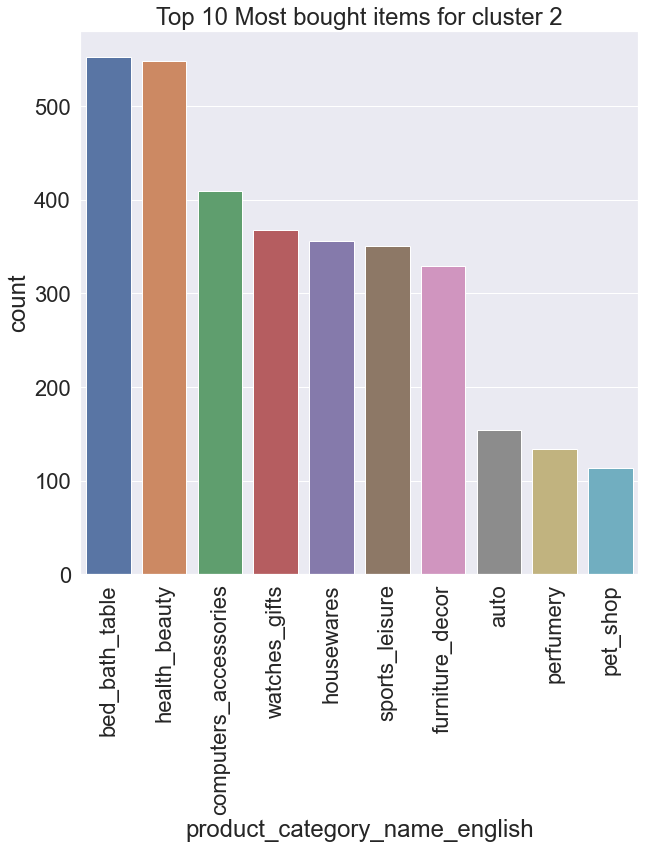

In [216]:
cat_check_item_english_filtered_2=cat_check_item_english_filtered[cat_check_item_english_filtered['ClusterID']==2]
plt.figure(figsize=(10,10))
plt.title('Top 10 Most bought items for cluster 2')
sns.countplot(data=cat_check_item_english_filtered_2,
              x='product_category_name_english',
              order=cat_check_item_english_filtered_2.product_category_name_english.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

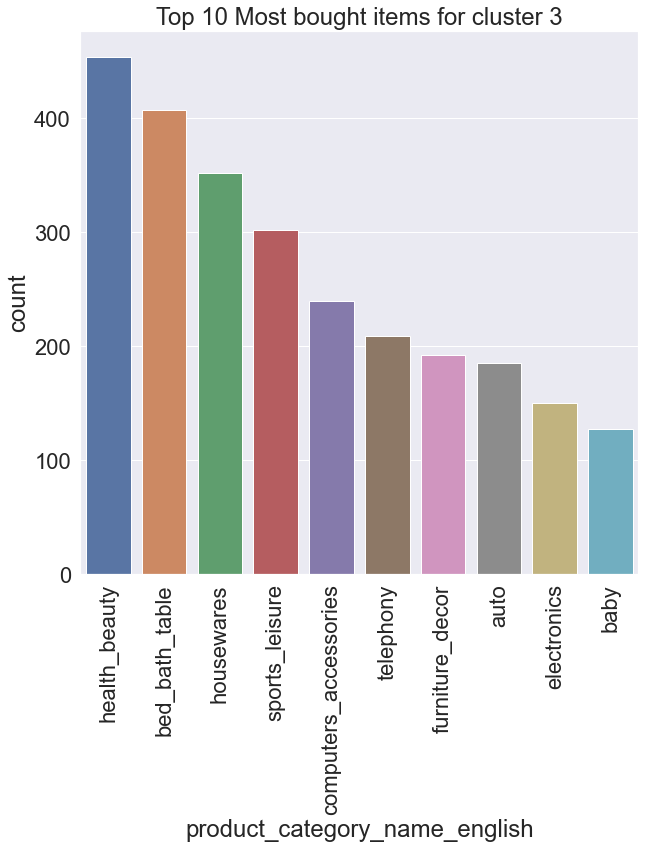

In [215]:
cat_check_item_english_filtered_3=cat_check_item_english_filtered[cat_check_item_english_filtered['ClusterID']==3]
plt.figure(figsize=(10,10))
plt.title('Top 10 Most bought items for cluster 3')
sns.countplot(data=cat_check_item_english_filtered_3,
              x='product_category_name_english',
              order=cat_check_item_english_filtered_3.product_category_name_english.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

Untuk Product yang direkomendasikan untuk setiap cluster bisa salah satu dari produk di atas.

## Pickle Save 

In [120]:
import pickle

In [121]:
filename = 'KMeans_K4_final.sav'
pickle.dump(model_cluster4, open(filename,'wb'))

## Menggunakan K-means tanpa menggunakan RFM.

In [122]:
rfm_end

customer_unique_id   price  frequency  \
0      0004bd2a26a76fe21f786e4fbd80607f  154.00          1   
1      000d460961d6dbfa3ec6c9f5805769e1   28.90          1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43   12.88          1   
3      0010fb34b966d44409382af9e8fd5b77   49.95          1   
4      0014a5a58da615f7b01a4f5e194bf5ea   88.00          1   
...                                 ...     ...        ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f   41.29          1   
14524  ffcd4b43c08405501a6bf2c66be83e83   22.90          1   
14525  ffddff7cfa827d6c430ed9e373be416c   97.00          1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  179.00          1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0   89.99          1   

       day_since_last_purchase  
0                       -165.0  
1                       -251.0  
2                       -120.0  
3                       -175.0  
4                       -236.0  
...                        ...  
14523                   -312.0  
14524                   -147.0  
14525                   -426.0  
14526                   -213.0  
14527                   -397.0  

[14528 rows x 4 columns]

In [123]:
rfm_end

customer_unique_id   price  frequency  \
0      0004bd2a26a76fe21f786e4fbd80607f  154.00          1   
1      000d460961d6dbfa3ec6c9f5805769e1   28.90          1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43   12.88          1   
3      0010fb34b966d44409382af9e8fd5b77   49.95          1   
4      0014a5a58da615f7b01a4f5e194bf5ea   88.00          1   
...                                 ...     ...        ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f   41.29          1   
14524  ffcd4b43c08405501a6bf2c66be83e83   22.90          1   
14525  ffddff7cfa827d6c430ed9e373be416c   97.00          1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  179.00          1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0   89.99          1   

       day_since_last_purchase  
0                       -165.0  
1                       -251.0  
2                       -120.0  
3                       -175.0  
4                       -236.0  
...                        ...  
14523                   -312.0  
14524                   -147.0  
14525                   -426.0  
14526                   -213.0  
14527                   -397.0  

[14528 rows x 4 columns]

In [124]:
X_noclass=rfm_end.drop(['customer_unique_id'],axis=1)
X_noclass

price  frequency  day_since_last_purchase
0      154.00          1                   -165.0
1       28.90          1                   -251.0
2       12.88          1                   -120.0
3       49.95          1                   -175.0
4       88.00          1                   -236.0
...       ...        ...                      ...
14523   41.29          1                   -312.0
14524   22.90          1                   -147.0
14525   97.00          1                   -426.0
14526  179.00          1                   -213.0
14527   89.99          1                   -397.0

[14528 rows x 3 columns]

Kita Lakukan Pengecekan Silhouette Score

In [125]:
silhouette = []
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,random_state=2021)
    kmeans.fit(X_noclass)
    labels = kmeans.labels_
    silhouette.append(silhouette_score(X_noclass, labels, metric='euclidean'))


In [126]:
silhouette

[0.9980107885172421,
 0.9930604166873639,
 0.9082895481725002,
 0.9082903674785269,
 0.859753639187056,
 0.43120266763647863,
 0.47368111934594265,
 0.4848271412389898,
 0.48486339844247756,
 0.40479719813706283,
 0.4102175978600563,
 0.41317339546876425,
 0.4120946878129176,
 0.41111496980589973,
 0.42247325952902104,
 0.37751233352366503,
 0.37726686748491,
 0.380307714512265]

Bisa dilakukan pengecekan jumlah cluster berdasarkan Silhouette Scorenya

C:\Users\findi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\findi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



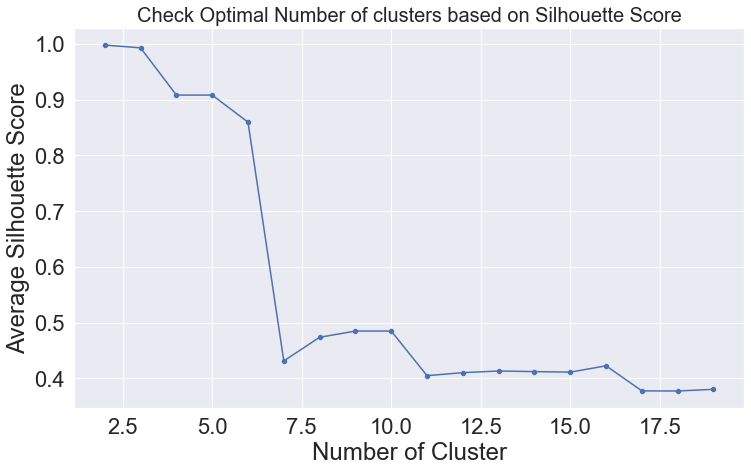

In [127]:
plt.figure(figsize=(12,7))
sns.lineplot(range(2,20), silhouette)
sns.scatterplot(range(2,20), silhouette)
plt.title('Check Optimal Number of clusters based on Silhouette Score',{'fontsize' :20})
plt.xlabel('Number of Cluster')
plt.ylabel('Average Silhouette Score')
plt.show()

Kita lakukan juga pengecekan dengan Elbow Method

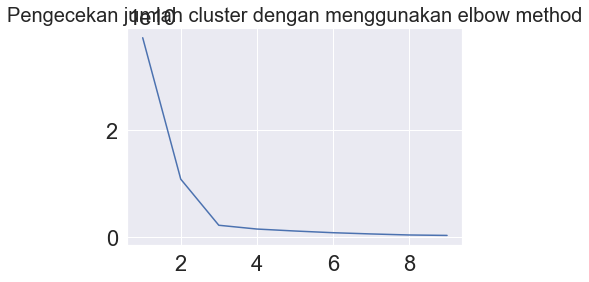

In [128]:
# sum of squared distances
%matplotlib inline
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters,random_state=2021)
    model_clus.fit(X_noclass)
    ssd.append(model_clus.inertia_)

plt.plot(list(range(1,10)), ssd)
plt.title('Pengecekan jumlah cluster dengan menggunakan elbow method',fontdict= {'fontsize' : 20})
# plt.xticks(range(1,10), )
# plt.xtick_labels(range(1,10))
plt.show()

Ketika menggunakan K-means tanpa RFM,  menggunakan elbow method dan silhouette score , dapat dilihat bahwa mulai dari ```n_clusters = 3``` perubahan nilai similarity menjadi insignificant. Oleh karena itu , bisa digunakan ```n_clusters = 3``` .

In [129]:
kmeans_noclass=KMeans(n_clusters=3, random_state=2021)
model_noclass_k3=kmeans_noclass.fit(X_noclass)

In [130]:
## hasil klasifikasi k-means tanpa dengan n-cluster=3
rfm_noclass_kmeans_k3 = pd.concat([rfm_end,pd.Series(model_noclass_k3.labels_)],axis=1)
rfm_noclass_kmeans_k3.columns=['customer_unique_id','monetary','frequency','recency','ClusterID']
rfm_noclass_kmeans_k3

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
14523          0  
14524          0  
14525          0  
14526          0  
14527          0  

[14528 rows x 5 columns]

In [131]:
rfm_noclass_kmeans_k3['ClusterID'].value_counts()

0    14522
2        5
1        1
Name: ClusterID, dtype: int64

Meskipun memiliki Nilai silhouette score yang baik , pemisahan cluster kurang baik , karena hampir semua data dimasukkan ke dalam class 0 , sehingga tidak ada segmentasi.hal ini mungkin karena masih ada outlier. Untuk menghindari hal ini , kita bisa mencoba menggunakan RobustScaler untuk menghilangkan outlier.

In [132]:
kmeans_transformer=ColumnTransformer([('robust',RobustScaler(),['price','frequency','day_since_last_purchase'])])
                                                                ## remainder akan di drop
kmeans_scaled_pipeline=Pipeline([
    ('robust',kmeans_transformer),
    ('kmeansk3',kmeans_noclass)
])
kmeans_noclass_scaled=kmeans_scaled_pipeline.fit(X_noclass)

In [133]:
kmeans_noclass_scaled.get_params()

{'memory': None,
 'steps': [('robust',
   ColumnTransformer(transformers=[('robust', RobustScaler(),
                                    ['price', 'frequency',
                                     'day_since_last_purchase'])])),
  ('kmeansk3', KMeans(n_clusters=3, random_state=2021))],
 'verbose': False,
 'robust': ColumnTransformer(transformers=[('robust', RobustScaler(),
                                  ['price', 'frequency',
                                   'day_since_last_purchase'])]),
 'kmeansk3': KMeans(n_clusters=3, random_state=2021),
 'robust__n_jobs': None,
 'robust__remainder': 'drop',
 'robust__sparse_threshold': 0.3,
 'robust__transformer_weights': None,
 'robust__transformers': [('robust',
   RobustScaler(),
   ['price', 'frequency', 'day_since_last_purchase'])],
 'robust__verbose': False,
 'robust__robust': RobustScaler(),
 'robust__robust__copy': True,
 'robust__robust__quantile_range': (25.0, 75.0),
 'robust__robust__unit_variance': False,
 'robust__robust__with_ce

In [134]:
kmeans_noclass_scaled[1].labels_

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
## kita concate cluster yang ada dengan rfm yang belum diberi label class
df_rfm_noclass_kmeans_scaled_k3=pd.concat([rfm_end,pd.Series(kmeans_noclass_scaled[1].labels_)],axis=1)
df_rfm_noclass_kmeans_scaled_k3.columns=['customer_unique_id','monetary','frequency','recency','ClusterID']
df_rfm_noclass_kmeans_scaled_k3

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
14523          0  
14524          0  
14525          0  
14526          0  
14527          0  

[14528 rows x 5 columns]

In [136]:
df_rfm_noclass_kmeans_scaled_k3.to_csv('./csv/df_rfm_noclass_kmeans_scaled_k3.csv',index=False)
cekcsv=pd.read_csv('./csv/df_rfm_noclass_kmeans_scaled_k3.csv')
cekcsv

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
14523          0  
14524          0  
14525          0  
14526          0  
14527          0  

[14528 rows x 5 columns]

In [137]:
df_rfm_noclass_kmeans_scaled_k3['ClusterID'].value_counts()

0    14522
2        5
1        1
Name: ClusterID, dtype: int64

Kita akan mencoba juga dengan ```n_clusters = 4``` untuk scaled dan nonscaled

In [138]:
kmeans_noclass_k4=KMeans(n_clusters=4, random_state=2021)
model_noclass_k4=kmeans_noclass_k4.fit(X_noclass)

In [139]:
## hasil klasifikasi k-means tanpa dengan n-cluster=4
rfm_noclass_kmeans_k4 = pd.concat([rfm_end,pd.Series(model_noclass_k4.labels_)],axis=1)
rfm_noclass_kmeans_k4.columns=['customer_unique_id','monetary','frequency','recency','ClusterID']
rfm_noclass_kmeans_k4

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
14523          0  
14524          0  
14525          0  
14526          0  
14527          0  

[14528 rows x 5 columns]

In [140]:
rfm_noclass_kmeans_k4['ClusterID'].value_counts()

0    14436
3       86
2        5
1        1
Name: ClusterID, dtype: int64

Setelah menggunakan cluster 4 pun masih belum baik dalam memberi klasifikasi, karena hampir semua data diberi label 0. 
kita akan mencoba juga dengan menggunakan RobustScaler.

In [141]:
kmeans_k4_transformer=ColumnTransformer([('robust',RobustScaler(),['price','frequency','day_since_last_purchase'])])
                                                                ## remainder akan di drop
kmeans_scaled_k4_pipeline=Pipeline([
    ('robust',kmeans_transformer),
    ('kmeansk4',kmeans_noclass_k4)
])
kmeans_noclass_k4_scaled=kmeans_scaled_k4_pipeline.fit(X_noclass)

In [142]:
kmeans_noclass_k4_scaled.get_params()

{'memory': None,
 'steps': [('robust',
   ColumnTransformer(transformers=[('robust', RobustScaler(),
                                    ['price', 'frequency',
                                     'day_since_last_purchase'])])),
  ('kmeansk4', KMeans(n_clusters=4, random_state=2021))],
 'verbose': False,
 'robust': ColumnTransformer(transformers=[('robust', RobustScaler(),
                                  ['price', 'frequency',
                                   'day_since_last_purchase'])]),
 'kmeansk4': KMeans(n_clusters=4, random_state=2021),
 'robust__n_jobs': None,
 'robust__remainder': 'drop',
 'robust__sparse_threshold': 0.3,
 'robust__transformer_weights': None,
 'robust__transformers': [('robust',
   RobustScaler(),
   ['price', 'frequency', 'day_since_last_purchase'])],
 'robust__verbose': False,
 'robust__robust': RobustScaler(),
 'robust__robust__copy': True,
 'robust__robust__quantile_range': (25.0, 75.0),
 'robust__robust__unit_variance': False,
 'robust__robust__with_ce

In [143]:
kmeans_noclass_k4_scaled[1].labels_

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
## kita concate cluster yang ada dengan rfm yang belum diberi label class
df_rfm_noclass_kmeans_scaled_k4=pd.concat([rfm_end,pd.Series(kmeans_noclass_k4_scaled[1].labels_)],axis=1)
df_rfm_noclass_kmeans_scaled_k4.columns=['customer_unique_id','monetary','frequency','recency','ClusterID']
df_rfm_noclass_kmeans_scaled_k4

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
14523          0  
14524          0  
14525          0  
14526          0  
14527          0  

[14528 rows x 5 columns]

In [145]:
df_rfm_noclass_kmeans_scaled_k4.to_csv('./csv/df_rfm_noclass_kmeans_scaled_k4.csv',index=False)
cekcsv=pd.read_csv('./csv/df_rfm_noclass_kmeans_scaled_k4.csv')
cekcsv

customer_unique_id  monetary  frequency  recency  \
0      0004bd2a26a76fe21f786e4fbd80607f    154.00          1   -165.0   
1      000d460961d6dbfa3ec6c9f5805769e1     28.90          1   -251.0   
2      000ed48ceeb6f4bf8ad021a10a3c7b43     12.88          1   -120.0   
3      0010fb34b966d44409382af9e8fd5b77     49.95          1   -175.0   
4      0014a5a58da615f7b01a4f5e194bf5ea     88.00          1   -236.0   
...                                 ...       ...        ...      ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f     41.29          1   -312.0   
14524  ffcd4b43c08405501a6bf2c66be83e83     22.90          1   -147.0   
14525  ffddff7cfa827d6c430ed9e373be416c     97.00          1   -426.0   
14526  ffe0c10afc687bcf34a0451f2b87dd9b    179.00          1   -213.0   
14527  ffe8f2fc0cee48f79934bd2c506fafc0     89.99          1   -397.0   

       ClusterID  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
14523          0  
14524          0  
14525          0  
14526          0  
14527          0  

[14528 rows x 5 columns]

In [146]:
df_rfm_noclass_kmeans_scaled_k4['ClusterID'].value_counts()

0    14436
3       86
2        5
1        1
Name: ClusterID, dtype: int64

>## DB Scan

Kita akan mencoba menggunakan DB Scan untuk melakukan clustering.

In [147]:
X_noclass.columns

Index(['price', 'frequency', 'day_since_last_purchase'], dtype='object')

In [148]:
scaler = StandardScaler()
X_scaled_dbscan = scaler.fit_transform(X_noclass)
X_scaled_dbscan


array([[-0.0106968 , -0.15242813,  0.46224035],
       [-0.08906948, -0.15242813, -0.10881185],
       [-0.09910569, -0.15242813,  0.76104674],
       ...,
       [-0.04640617, -0.15242813, -1.27083668],
       [ 0.00496521, -0.15242813,  0.14351354],
       [-0.0507978 , -0.15242813, -1.07827257]])

In [149]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [150]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_scaled_dbscan)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_scaled_dbscan, DBS_clustering.labels_))

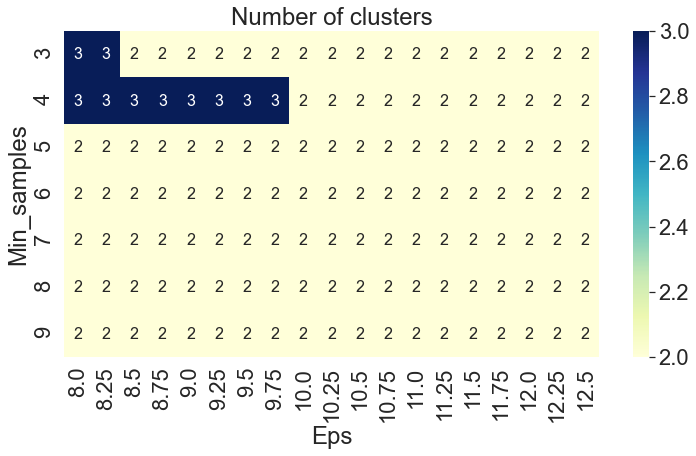

In [151]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

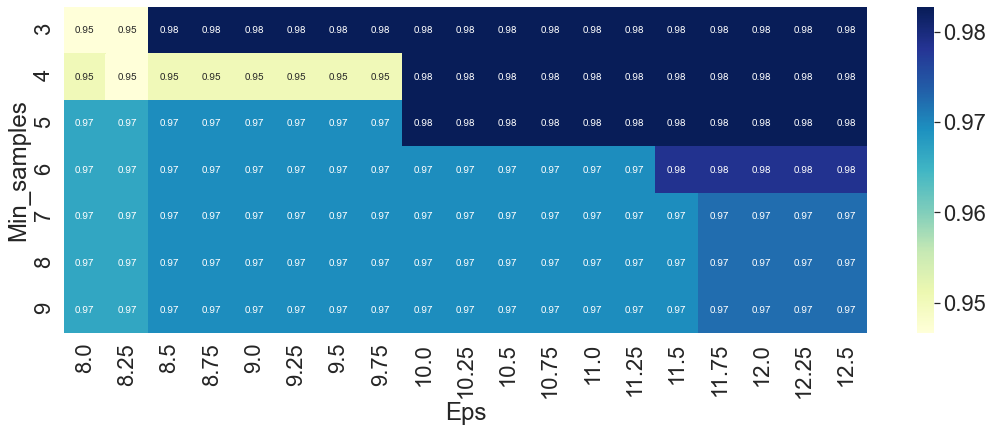

In [152]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Kita coba menggunakan ```Eps=10``` dan ```min_samples =4 ``` Untuk DBScan , biasa digunakan ```min_samples = dimensi + 1``` 

In [153]:
DBS_clustering = DBSCAN(eps=0.5, min_samples=4).fit(X_scaled_dbscan)

DBSCAN_clustered = rfm_end.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [154]:
DBSCAN_clustered

customer_unique_id   price  frequency  \
0      0004bd2a26a76fe21f786e4fbd80607f  154.00          1   
1      000d460961d6dbfa3ec6c9f5805769e1   28.90          1   
2      000ed48ceeb6f4bf8ad021a10a3c7b43   12.88          1   
3      0010fb34b966d44409382af9e8fd5b77   49.95          1   
4      0014a5a58da615f7b01a4f5e194bf5ea   88.00          1   
...                                 ...     ...        ...   
14523  ffc3ea5436ad9c11ee9abdd56b85509f   41.29          1   
14524  ffcd4b43c08405501a6bf2c66be83e83   22.90          1   
14525  ffddff7cfa827d6c430ed9e373be416c   97.00          1   
14526  ffe0c10afc687bcf34a0451f2b87dd9b  179.00          1   
14527  ffe8f2fc0cee48f79934bd2c506fafc0   89.99          1   

       day_since_last_purchase  Cluster  
0                       -165.0        0  
1                       -251.0        0  
2                       -120.0        0  
3                       -175.0        0  
4                       -236.0        0  
...                        ...      ...  
14523                   -312.0        0  
14524                   -147.0        0  
14525                   -426.0        0  
14526                   -213.0        0  
14527                   -397.0        0  

[14528 rows x 5 columns]

In [155]:
DBSCAN_clustered['Cluster'].value_counts()

 0    14036
 1      437
-1       36
 2       12
 3        7
Name: Cluster, dtype: int64

Dengan menggunakan DBSCan , hasil clustering tidak baik, karena hampir semua data dimasukkan dalam class 0. Hal ini bisa jadi karena tiap data point memiliki jarak yang berdeketan sehingga memiliki Euclidian Distance yang pendek.

In [156]:
df_to_predict = pd.DataFrame({
    'Recency': user['Recency'].apply(lambda x : rfm_recency(x)),
    'Frequency': user['Frequency'].apply(lambda x : rfm_freq(x)),
    'Monetary': user['Monetary'].apply(lambda x : rfm_price(x)),
})
prediction=model.predict(df_to_predict)

if prediction==0:
    category="Low Value, Churned"
elif prediction==1:
    category="High Value, Churned"
elif prediction==2:
    category="High Value Active"
else:
    category="Potential Customer"

NameError: name 'user' is not defined

In [ ]:
pd.Series([-50]).apply(lambda x : rfm_recency(x))[0]